# New Section

In [ ]:
!pip install rdt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.8/73.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.0 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras import regularizers, layers
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, PowerTransformer, StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from scipy.stats import chi2_contingency, ks_2samp, skew, pearsonr
from scipy.spatial.distance import jensenshannon
from rdt.transformers import ClusterBasedNormalizer

import torch
from torch import optim
from torch.nn import BatchNorm1d, Dropout, LeakyReLU, Linear, Module, ReLU, Sequential, functional, ModuleList, Tanh, Softmax, Sigmoid, BCELoss, MSELoss, CrossEntropyLoss
from torch.utils.data import DataLoader, TensorDataset
import copy, os

import os
import copy
import tqdm
import re
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Proposal 2/liver_cirrhosis.csv')
df.T

,0,1,2,3,4,5,6,7,8,9,...,24990,24991,24992,24993,24994,24995,24996,24997,24998,24999
N_Days,2221,1230,4184,2090,2105,4427,1418,51,2504,1012,...,1690,4365,694,2475,1654,3584,3584,971,3707,3707
Status,C,C,C,D,D,C,C,D,C,D,...,D,C,D,CL,C,D,D,D,C,C
Drug,Placebo,Placebo,Placebo,Placebo,Placebo,Placebo,Placebo,Placebo,Placebo,Placebo,...,D-penicillamine,D-penicillamine,D-penicillamine,D-penicillamine,Placebo,D-penicillamine,D-penicillamine,D-penicillamine,D-penicillamine,D-penicillamine
Age,18499,19724,11839,16467,21699,16418,23011,24107,15265,22280,...,17512,21324,28650,13329,19724,23612,23612,16736,16990,16990
Sex,F,M,F,F,F,F,F,F,F,M,...,F,F,M,F,M,F,F,F,F,F
Ascites,N,Y,N,N,N,N,Y,Y,N,Y,...,N,N,Y,N,Y,N,N,N,N,N
Hepatomegaly,Y,N,N,N,Y,N,N,N,N,N,...,Y,N,Y,N,N,N,N,Y,Y,Y
Spiders,N,Y,N,N,N,N,Y,Y,N,Y,...,N,N,Y,N,Y,N,N,Y,N,N
Edema,N,N,N,N,N,N,N,Y,N,S,...,N,N,N,N,N,N,N,Y,N,N
Bilirubin,0.5,0.5,0.5,0.7,1.9,1.9,1.3,12.6,2.3,1.4,...,6.3,0.9,0.8,3.4,1.7,0.8,0.8,5.1,0.8,0.8


In [ ]:
df['Stage'].value_counts()

,count
Stage,
2,8441
3,8294
1,8265


In [ ]:
df['Status'].value_counts()

,count
Status,
C,13516
D,9456
CL,2028


In [ ]:
df = df.drop_duplicates().reset_index(drop=True)
df.shape

(9639, 19)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
N_Days,9639.0,1910.982571,1093.620373,41.00,1103.00,1690.000000,2598.000000,4795.00
Age,9639.0,18429.717606,3693.953156,9598.00,15628.00,18628.000000,20819.000000,28650.00
Bilirubin,9639.0,3.228571,4.512278,0.30,0.80,1.300000,3.300000,28.00
Cholesterol,9639.0,371.706706,197.824339,120.00,271.00,369.510563,369.510563,1775.00
Albumin,9639.0,3.496118,0.382319,1.96,3.29,3.520000,3.760000,4.64
Copper,9639.0,97.027569,73.108854,4.00,51.00,97.648387,102.000000,588.00
Alk_Phos,9639.0,1973.572709,1827.063380,289.00,1031.00,1713.000000,1982.655769,13862.40
SGOT,9639.0,122.317487,47.653515,26.35,89.90,122.556346,134.850000,457.25
Tryglicerides,9639.0,123.587337,55.206301,33.00,93.00,124.702128,125.000000,598.00
Platelets,9639.0,253.787605,95.740700,62.00,188.00,249.000000,307.000000,721.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9639 entries, 0 to 9638
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         9639 non-null   int64  
 1   Status         9639 non-null   object 
 2   Drug           9639 non-null   object 
 3   Age            9639 non-null   int64  
 4   Sex            9639 non-null   object 
 5   Ascites        9639 non-null   object 
 6   Hepatomegaly   9639 non-null   object 
 7   Spiders        9639 non-null   object 
 8   Edema          9639 non-null   object 
 9   Bilirubin      9639 non-null   float64
 10  Cholesterol    9639 non-null   float64
 11  Albumin        9639 non-null   float64
 12  Copper         9639 non-null   float64
 13  Alk_Phos       9639 non-null   float64
 14  SGOT           9639 non-null   float64
 15  Tryglicerides  9639 non-null   float64
 16  Platelets      9639 non-null   float64
 17  Prothrombin    9639 non-null   float64
 18  Stage   

In [ ]:
df.nunique()

,0
N_Days,549
Status,3
Drug,2
Age,510
Sex,2
Ascites,2
Hepatomegaly,2
Spiders,2
Edema,3
Bilirubin,113


In [ ]:
binCol = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders']
catCol = ['Edema', 'Status', 'Stage']
numCol = df.columns.difference(binCol + catCol)
print(numCol)

Index(['Age', 'Albumin', 'Alk_Phos', 'Bilirubin', 'Cholesterol', 'Copper',
       'N_Days', 'Platelets', 'Prothrombin', 'SGOT', 'Tryglicerides'],
      dtype='object')


In [ ]:
df = pd.concat([df[numCol], df[binCol], df[catCol]], axis=1)
df

,Age,Albumin,Alk_Phos,Bilirubin,Cholesterol,Copper,N_Days,Platelets,Prothrombin,SGOT,Tryglicerides,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Status,Stage
0,18499,4.04,598.000000,0.5,149.000000,227.000000,2221,256.0,9.9,52.700000,57.000000,Placebo,F,N,Y,N,N,C,1
1,19724,3.93,663.000000,0.5,219.000000,22.000000,1230,220.0,10.8,45.000000,75.000000,Placebo,M,Y,N,Y,N,C,2
2,11839,3.54,1243.000000,0.5,320.000000,51.000000,4184,225.0,10.0,122.450000,80.000000,Placebo,F,N,N,N,N,C,2
3,16467,3.74,1024.000000,0.7,255.000000,23.000000,2090,151.0,10.2,77.500000,58.000000,Placebo,F,N,N,N,N,D,2
4,21699,3.54,1052.000000,1.9,486.000000,74.000000,2105,151.0,11.5,108.500000,109.000000,Placebo,F,N,Y,N,N,D,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9634,17897,3.49,1982.655769,0.7,369.510563,97.648387,3577,243.0,9.7,122.556346,124.702128,Placebo,F,Y,N,Y,N,C,1
9635,23376,3.24,1982.655769,1.8,369.510563,97.648387,4795,139.0,10.5,122.556346,124.702128,Placebo,F,Y,N,Y,N,C,1
9636,24585,3.48,2045.000000,2.1,262.000000,58.000000,3358,412.0,11.8,89.900000,84.000000,D-penicillamine,F,N,Y,N,N,D,3
9637,21324,3.40,1098.000000,0.9,346.000000,81.000000,4365,228.0,10.3,122.450000,90.000000,D-penicillamine,F,N,N,N,N,C,2


In [ ]:
encoder = LabelEncoder()
for col in catCol+binCol:
  df[col] = encoder.fit_transform(df[col])
df

,Age,Albumin,Alk_Phos,Bilirubin,Cholesterol,Copper,N_Days,Platelets,Prothrombin,SGOT,Tryglicerides,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Status,Stage
0,18499,4.04,598.000000,0.5,149.000000,227.000000,2221,256.0,9.9,52.700000,57.000000,1,0,0,1,0,0,0,0
1,19724,3.93,663.000000,0.5,219.000000,22.000000,1230,220.0,10.8,45.000000,75.000000,1,1,1,0,1,0,0,1
2,11839,3.54,1243.000000,0.5,320.000000,51.000000,4184,225.0,10.0,122.450000,80.000000,1,0,0,0,0,0,0,1
3,16467,3.74,1024.000000,0.7,255.000000,23.000000,2090,151.0,10.2,77.500000,58.000000,1,0,0,0,0,0,2,1
4,21699,3.54,1052.000000,1.9,486.000000,74.000000,2105,151.0,11.5,108.500000,109.000000,1,0,0,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9634,17897,3.49,1982.655769,0.7,369.510563,97.648387,3577,243.0,9.7,122.556346,124.702128,1,0,1,0,1,0,0,0
9635,23376,3.24,1982.655769,1.8,369.510563,97.648387,4795,139.0,10.5,122.556346,124.702128,1,0,1,0,1,0,0,0
9636,24585,3.48,2045.000000,2.1,262.000000,58.000000,3358,412.0,11.8,89.900000,84.000000,0,0,0,1,0,0,2,2
9637,21324,3.40,1098.000000,0.9,346.000000,81.000000,4365,228.0,10.3,122.450000,90.000000,0,0,0,0,0,0,0,1


In [ ]:
df['Stage'].value_counts()

,count
Stage,
1,3308
2,3306
0,3025


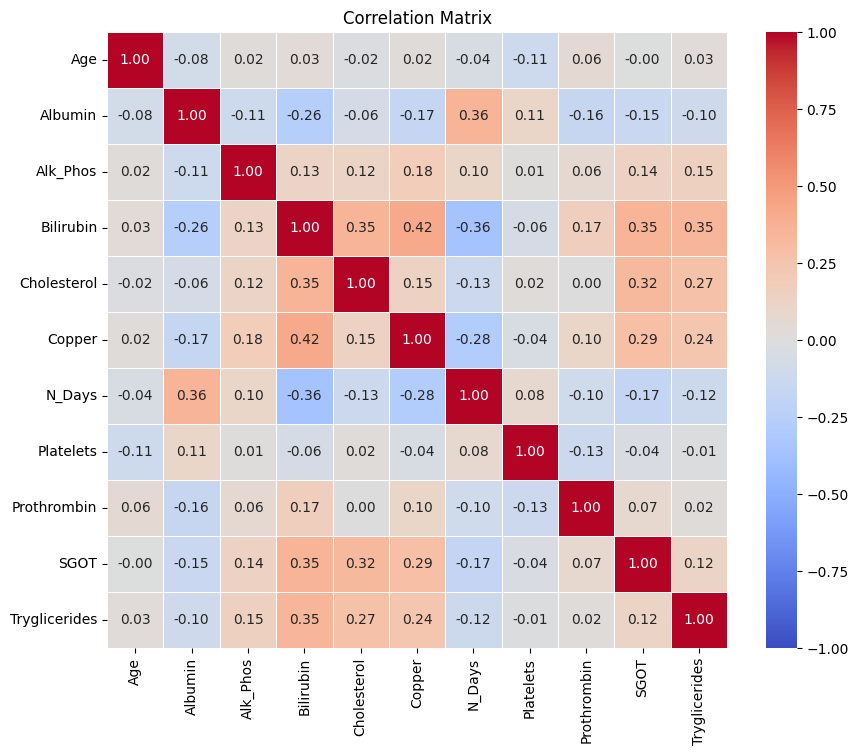

In [ ]:
corrMat = df[numCol].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    corrMat,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    linewidths=0.5,
)
plt.title("Correlation Matrix")
plt.show()

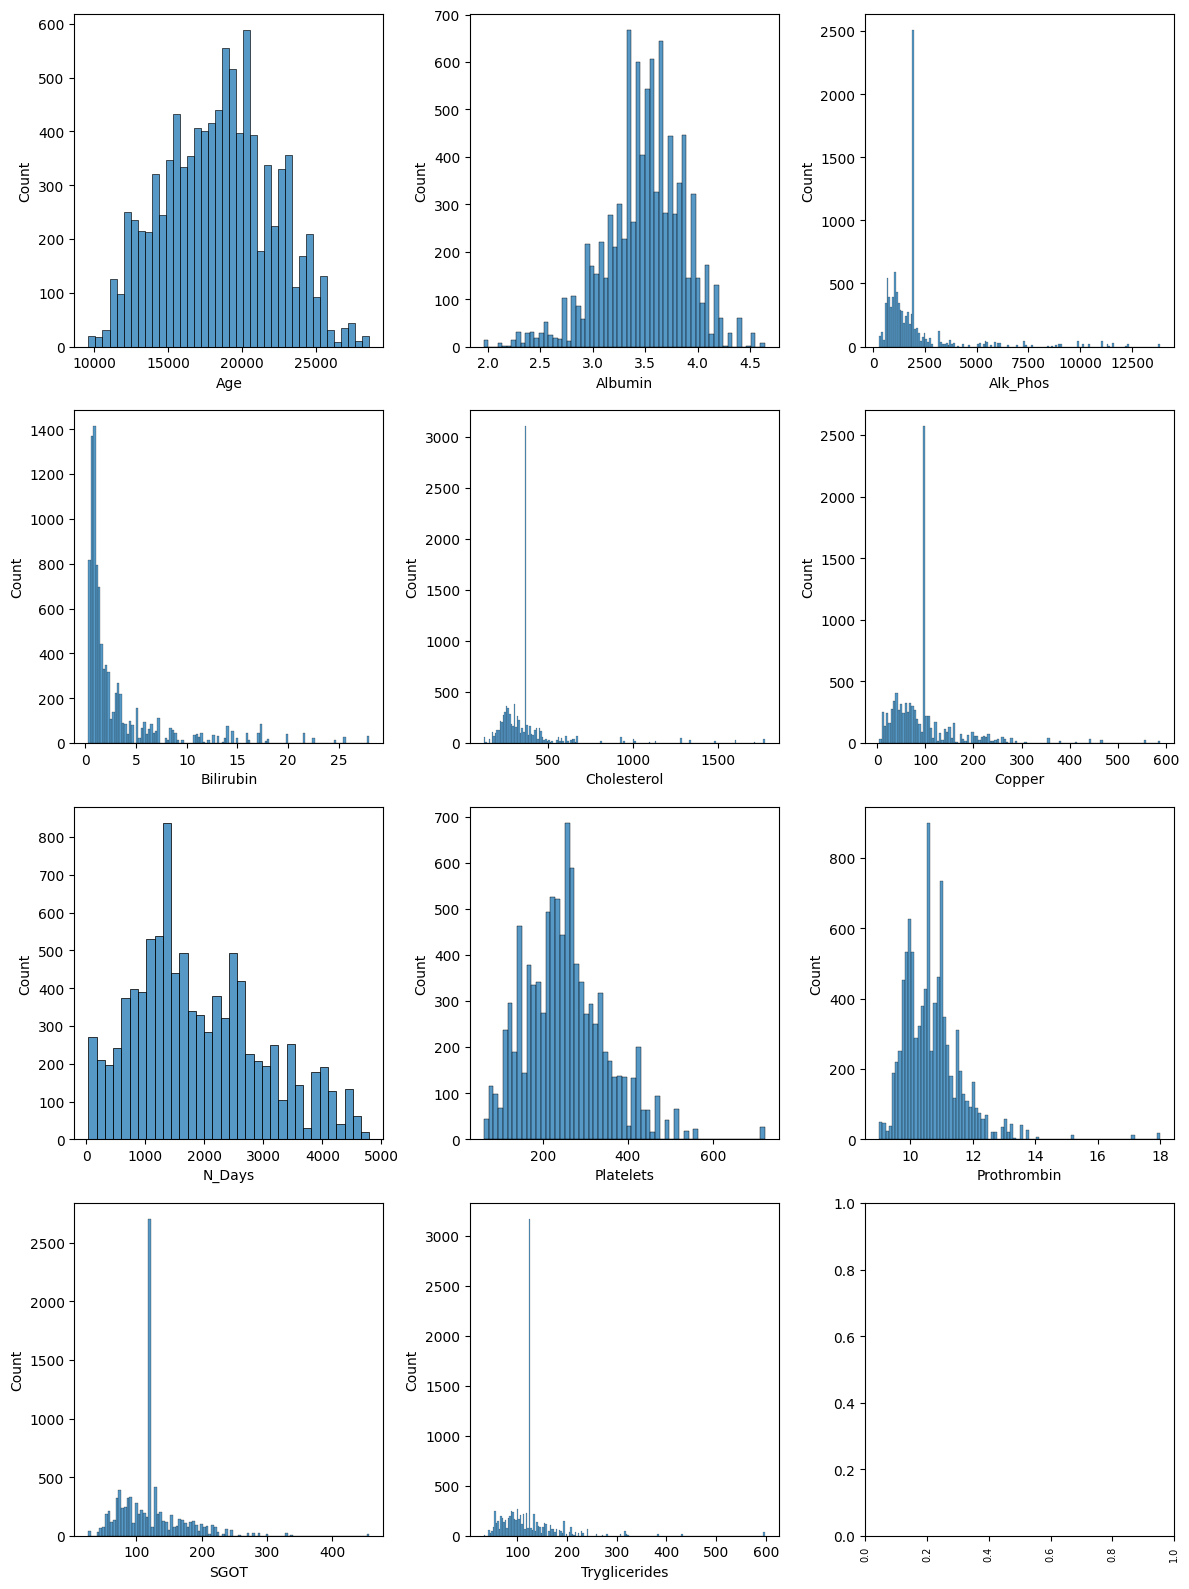

In [ ]:
num_rows = np.ceil(len(numCol) / 3)
fig, axes = plt.subplots(int(num_rows), 3, figsize=(12, 4 * num_rows))
axes = axes.flatten()

for i, col in enumerate(numCol):
  sns.histplot(data=df, x=col, ax=axes[i])
  plt.xticks(rotation=90, fontsize=7)

plt.tight_layout()
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

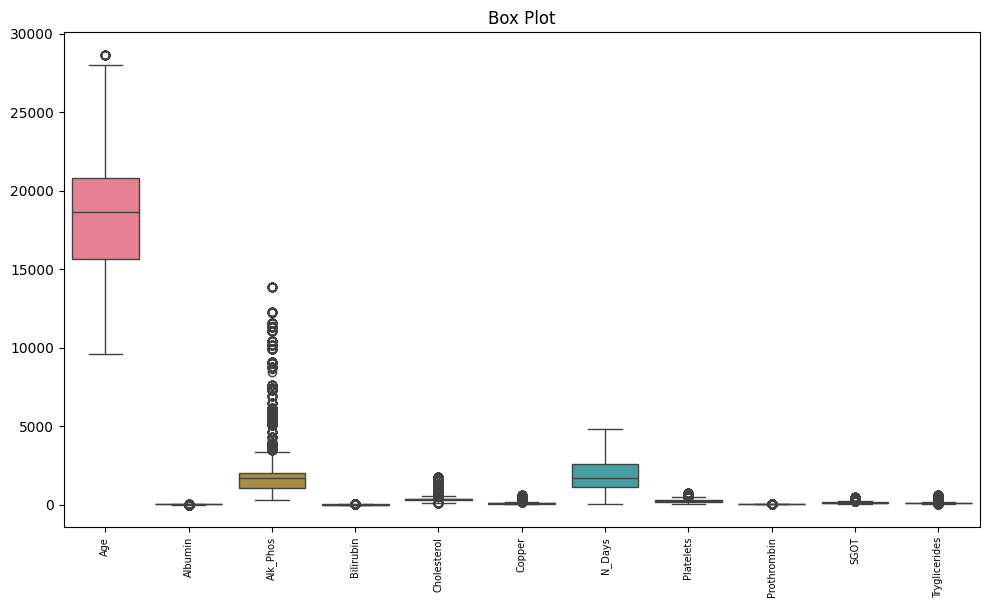

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numCol])
plt.xticks(rotation=90, fontsize=7)
plt.tight_layout()
plt.title('Box Plot')
plt

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

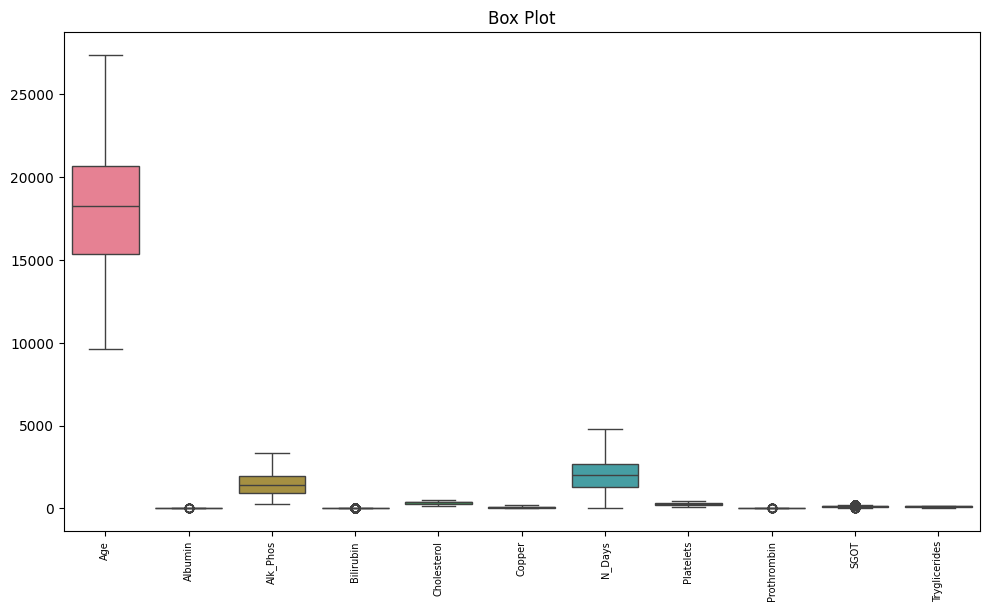

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numCol])
plt.xticks(rotation=90, fontsize=7)
plt.tight_layout()
plt.title('Box Plot')
plt

In [ ]:
df.nunique()

,0
Age,396
Albumin,135
Alk_Phos,220
Bilirubin,58
Cholesterol,143
Copper,116
N_Days,399
Platelets,251
Prothrombin,37
SGOT,143


In [ ]:
df['Status'].value_counts()

,count
Status,
0,3238
2,1053
1,256


In [ ]:
trainX, valX, trainY, valY = train_test_split(df.drop(['Stage'], axis=1), df['Stage'], test_size=0.2, random_state=42, stratify=df['Stage'])
trainY.value_counts()

,count
Stage,
0,1416
1,1283
2,938


In [ ]:
trainX.nunique()

,0
Age,376
Albumin,133
Alk_Phos,210
Bilirubin,56
Cholesterol,140
Copper,112
N_Days,377
Platelets,247
Prothrombin,37
SGOT,136


In [ ]:
valX.nunique()

,0
Age,267
Albumin,118
Alk_Phos,170
Bilirubin,52
Cholesterol,108
Copper,95
N_Days,275
Platelets,189
Prothrombin,33
SGOT,110


In [ ]:
valY.value_counts()

,count
Stage,
0,354
1,321
2,235


In [ ]:
trainX = trainX.drop(['Edema', 'Sex'], axis=1).reset_index(drop=True)
trainY = trainY.reset_index(drop=True)
valX = valX.drop(['Edema', 'Sex'], axis=1).reset_index(drop=True)
valY = valY.reset_index(drop=True)

catCol.remove('Edema')
binCol.remove('Sex')

TrainX = pd.concat([trainX, trainY], axis=1)
ValX = pd.concat([valX, valY], axis=1)

TrainX.T

,0,1,2,3,4,5,6,7,8,9,...,3627,3628,3629,3630,3631,3632,3633,3634,3635,3636
Age,21294.00,20454.00,20296.000000,25202.00,13918.00,20089.00,15177.00,24585.000000,25202.000000,20708.0,...,13178.00,23011.00,13995.000000,14212.00,15706.000000,16122.00,14106.00,14245.000000,14106.00,18499.00
Albumin,3.60,3.66,3.850000,3.00,3.53,4.15,3.45,3.350000,3.560000,3.7,...,3.37,3.61,3.500000,3.55,3.580000,3.67,3.57,3.830000,3.66,3.63
Alk_Phos,724.00,685.00,1282.000000,746.00,671.00,1387.00,1072.00,1982.655769,1982.655769,1006.0,...,1408.00,1677.00,1982.655769,815.00,1982.655769,754.00,2201.00,1982.655769,685.00,1812.00
Bilirubin,1.20,0.70,0.500000,2.30,3.40,1.30,0.60,0.600000,3.100000,1.5,...,3.40,2.20,0.900000,3.20,1.000000,2.00,1.20,0.900000,0.70,1.30
Cholesterol,256.00,204.00,369.510563,178.00,279.00,408.00,239.00,369.510563,369.510563,253.0,...,450.00,328.00,369.510563,260.00,369.510563,267.00,258.00,369.510563,204.00,360.00
Copper,74.00,28.00,63.000000,145.00,143.00,67.00,31.00,97.648387,97.648387,67.0,...,32.00,75.00,97.648387,91.00,97.648387,89.00,79.00,97.648387,28.00,52.00
N_Days,3992.00,3672.00,2644.000000,552.00,1504.00,3527.00,1216.00,1874.000000,94.000000,1978.0,...,2475.00,1170.00,1560.000000,2256.00,1097.000000,3445.00,4196.00,1103.000000,3672.00,2456.00
Platelets,231.00,141.00,311.000000,249.00,136.00,280.00,195.00,412.000000,120.000000,231.0,...,313.00,224.00,309.000000,141.00,214.000000,318.00,309.00,120.000000,309.00,256.00
Prothrombin,10.80,10.00,9.700000,12.00,10.90,10.10,10.30,11.100000,11.100000,9.6,...,11.20,10.00,9.500000,10.90,10.500000,11.80,11.40,11.100000,9.70,9.90
SGOT,141.05,72.85,79.050000,178.25,113.15,142.60,55.00,122.556346,122.556346,139.5,...,116.25,87.00,122.556346,127.10,122.556346,196.85,120.90,122.556346,72.85,97.65


In [ ]:
ValX.T

,0,1,2,3,4,5,6,7,8,9,...,900,901,902,903,904,905,906,907,908,909
Age,16802.000000,11912.00,12636.000000,21828.000000,19060.00,12979.000000,22280.00,11485.000000,21904.00,17245.000000,...,12779.000000,23585.00,13995.00,20089.00,22336.00,11462.000000,19693.00,22347.00,20354.000000,13879.00
Albumin,2.680000,4.09,3.890000,3.310000,3.15,3.810000,3.66,3.740000,2.97,3.850000,...,3.810000,2.97,3.52,2.93,3.43,3.010000,3.36,3.58,3.490000,3.85
Alk_Phos,1982.655769,1181.00,728.000000,1982.655769,1523.00,1982.655769,1065.00,1982.655769,1110.00,663.000000,...,1982.655769,1553.00,1622.00,674.00,1142.00,1982.655769,722.00,1636.00,1982.655769,466.00
Bilirubin,4.500000,0.70,0.500000,1.600000,1.30,1.500000,0.70,1.500000,3.10,0.500000,...,1.500000,1.90,1.30,0.50,1.20,0.600000,1.40,0.40,1.100000,0.70
Cholesterol,369.510563,174.00,369.510563,369.510563,302.00,369.510563,274.00,369.510563,277.00,369.510563,...,369.510563,354.00,304.00,226.00,275.00,369.510563,294.00,246.00,369.510563,193.00
Copper,97.648387,58.00,29.000000,97.648387,58.00,97.648387,108.00,97.648387,42.00,63.000000,...,97.648387,86.00,97.00,22.00,100.00,97.648387,33.00,24.00,97.648387,35.00
N_Days,703.000000,4039.00,2170.000000,617.000000,769.00,1072.000000,2022.00,4508.000000,1615.00,2644.000000,...,1072.000000,1810.00,1455.00,1525.00,533.00,655.000000,2363.00,1153.00,2202.000000,1735.00
Platelets,219.000000,203.00,423.000000,181.000000,224.00,246.000000,221.00,242.000000,221.00,180.000000,...,340.000000,277.00,309.00,209.00,233.00,293.000000,188.00,288.00,283.000000,335.00
Prothrombin,11.500000,10.60,10.100000,10.100000,10.50,10.800000,10.10,9.700000,9.80,11.200000,...,10.100000,9.90,9.50,10.60,9.90,10.900000,11.80,10.40,9.900000,10.50
SGOT,122.556346,71.30,66.650000,122.556346,43.40,122.556346,88.35,122.556346,125.00,79.050000,...,122.556346,196.85,71.00,58.00,75.00,122.556346,93.00,91.00,122.556346,53.00


In [ ]:
TrainX.isna().sum()

,0
Age,0
Albumin,0
Alk_Phos,0
Bilirubin,0
Cholesterol,0
Copper,0
N_Days,0
Platelets,0
Prothrombin,0
SGOT,0


# Preprocessing

In [ ]:
numdf = TrainX[numCol]

for col in numdf.columns:
  print(f'{col} skewnness : {skew(numdf[col])}')

Age skewnness : -0.005758667499822806
Albumin skewnness : -0.18004690265005938
Alk_Phos skewnness : -0.015455100089707885
Bilirubin skewnness : 2.141817157130628
Cholesterol skewnness : -0.36655820912618126
Copper skewnness : 0.15924586828993145
N_Days skewnness : 0.3319095740412188
Platelets skewnness : 0.2854060481205502
Prothrombin skewnness : 0.4042621039026668
SGOT skewnness : -0.04784738106913813
Tryglicerides skewnness : -0.48955065139106857


In [ ]:
pt = PowerTransformer(method='yeo-johnson')
TrainX[numCol] = pt.fit_transform(TrainX[numCol])
ValX[numCol] = pt.transform(ValX[numCol])

## CTData

In [ ]:
def createCTInfo(dataFrame):
  catInfo = {}
  cat_info = {}
  idx = 0
  for num, col in enumerate(dataFrame.columns):
    col_info = {}
    col_info['idx'] = idx
    col_info['len'] = len(dataFrame[col].unique())
    col_info['freq'] = {}
    data = {}

    vc = dataFrame[col].value_counts().apply(lambda x: np.log(x+1))

    for key, val in vc.items():
      freq = val / np.sum(vc)
      data[key] = freq
    col_info['freq'] = data

    catInfo[num] = col_info

    idx += len(dataFrame[col].unique())

  cat_info['length'] = idx
  cat_info['data'] = catInfo

  return cat_info

def transformData(trainNum, valNum, mc):
  numInfo = {}
  num_info = {}
  idx = 0

  glob_normT = pd.DataFrame()
  glob_normV = pd.DataFrame()

  for i in range(trainNum.shape[1]):
    col = trainNum.columns[i]
    col_info = {}
    col_info['idx'] = idx

    gm = ClusterBasedNormalizer(max_clusters=mc)

    normalized_num = gm.fit_transform(trainNum, column=col)
    normalized_val = normalized_num[f'{col}.normalized'].reset_index(drop=True)
    normalized_com = normalized_num[f'{col}.component']
    len_labels = len(normalized_com.unique())
    oneHot_norm = to_categorical(x=normalized_com, num_classes=len_labels)
    oneHot_norm = pd.DataFrame(oneHot_norm, columns=[f'{col}_{i}' for i in range(oneHot_norm.shape[1])]).reset_index(drop=True)
    loc_normT = pd.concat([normalized_val, oneHot_norm], axis=1).reset_index(drop=True)
    glob_normT = pd.concat([glob_normT, loc_normT], axis=1).reset_index(drop=True)

    normalized_num = gm.transform(valNum[[col]])
    normalized_val = normalized_num[f'{col}.normalized'].reset_index(drop=True)
    normalized_com = normalized_num[f'{col}.component']
    oneHot_norm = to_categorical(x=normalized_com, num_classes=len_labels)
    oneHot_norm = pd.DataFrame(oneHot_norm, columns=[f'{col}_{i}' for i in range(oneHot_norm.shape[1])]).reset_index(drop=True)
    loc_normV = pd.concat([normalized_val, oneHot_norm], axis=1).reset_index(drop=True)
    glob_normV = pd.concat([glob_normV, loc_normV], axis=1).reset_index(drop=True)

    col_info['len'] = len_labels + 1
    numInfo[i] = col_info
    idx += len_labels + 1

  num_info['length'] = idx
  num_info['data'] = numInfo

  return glob_normT, glob_normV, num_info

In [ ]:
ctTrain = copy.deepcopy(TrainX)
ctVal = copy.deepcopy(ValX)

numT_DF = ctTrain[numCol]
numV_DF = ctVal[numCol]

In [ ]:
ctTrain.T

,0,1,2,3,4,5,6,7,8,9,...,3627,3628,3629,3630,3631,3632,3633,3634,3635,3636
Age,0.877804,0.650341,0.607440,1.923410,-1.160166,0.551176,-0.805053,1.759621,1.923410,0.719231,...,-1.370569,1.339652,-1.138347,-1.076928,-0.656849,-0.540699,-1.106916,-1.067597,-1.106916,0.116768
Albumin,0.047556,0.234345,0.839797,-1.703109,-0.167684,1.838746,-0.410132,-0.707866,-0.075792,0.360048,...,-0.648793,0.078540,-0.259045,-0.106482,-0.014236,0.265683,-0.045044,0.775068,0.234345,0.140686
Alk_Phos,-1.279297,-1.358474,-0.221136,-1.235015,-1.387117,-0.033778,-0.605585,0.981390,0.981390,-0.729462,...,0.003343,0.469598,0.981390,-1.097795,0.981390,-1.218978,1.337166,0.981390,-1.358474,0.697785
Bilirubin,0.198996,-0.741706,-1.332455,1.146901,1.563324,0.330289,-1.015259,-1.015259,1.475709,0.556077,...,1.563324,1.091895,-0.295068,1.506561,-0.110858,0.968745,0.198996,-0.295068,-0.741706,0.330289
Cholesterol,-0.972991,-1.608377,0.710722,-1.890923,-0.663622,1.366821,-1.190681,0.710722,0.710722,-1.012093,...,2.128914,0.050224,0.710722,-0.920403,0.710722,-0.827135,-0.946762,0.710722,-1.608377,0.555009
Copper,0.067301,-1.305525,-0.234977,1.815312,1.769537,-0.123669,-1.204405,0.682620,0.682620,-0.123669,...,-1.171229,0.094213,0.682620,0.513749,0.682620,0.462363,0.200998,0.682620,-1.305525,-0.550505
N_Days,1.682858,1.434558,0.582720,-1.666623,-0.506658,1.319709,-0.821475,-0.130098,-2.507727,-0.028829,...,0.432901,-0.873938,-0.447850,0.233621,-0.958617,1.254070,1.837717,-0.951589,1.434558,0.415849
Platelets,-0.206870,-1.409840,0.715926,0.010253,-1.484252,0.370588,-0.661640,1.758955,-1.729719,-0.206870,...,0.737741,-0.293044,0.694057,-1.409840,-0.417961,0.792048,0.694057,-1.729719,0.694057,0.093055
Prothrombin,0.562888,-0.775108,-1.352839,2.140049,0.712087,-0.592495,-0.241193,0.999856,0.999856,-1.555995,...,1.138650,-0.775108,-1.764768,0.712087,0.092582,1.906580,1.406590,0.999856,-1.352839,-0.962584
SGOT,0.961866,-1.164380,-0.972437,2.132105,0.088504,1.010503,-1.714912,0.382484,0.382484,0.913240,...,0.185333,-0.725845,0.382484,0.524665,0.382484,2.719295,0.330681,0.382484,-1.164380,-0.394749


In [ ]:
'''scaler = Pipeline([
  ('outlier', RobustScaler()),
  #('num', MinMaxScaler())
])

numT_DF = pd.DataFrame(scaler.fit_transform(numT_DF), columns=numT_DF.columns)
numV_DF = pd.DataFrame(scaler.transform(numV_DF), columns=numV_DF.columns)'''

"scaler = Pipeline([\n  ('outlier', RobustScaler()),\n  #('num', MinMaxScaler())\n])\n\nnumT_DF = pd.DataFrame(scaler.fit_transform(numT_DF), columns=numT_DF.columns)\nnumV_DF = pd.DataFrame(scaler.transform(numV_DF), columns=numV_DF.columns)"

In [ ]:
normTrain, normVal, numInfo = transformData(numT_DF, numV_DF, 3)

ctTrain.columns

Index(['Age', 'Albumin', 'Alk_Phos', 'Bilirubin', 'Cholesterol', 'Copper',
       'N_Days', 'Platelets', 'Prothrombin', 'SGOT', 'Tryglicerides', 'Drug',
       'Ascites', 'Hepatomegaly', 'Spiders', 'Status', 'Stage'],
      dtype='object')

In [ ]:
numInfo

{'length': 44,
 'data': {0: {'idx': 0, 'len': 4},
  1: {'idx': 4, 'len': 4},
  2: {'idx': 8, 'len': 4},
  3: {'idx': 12, 'len': 4},
  4: {'idx': 16, 'len': 4},
  5: {'idx': 20, 'len': 4},
  6: {'idx': 24, 'len': 4},
  7: {'idx': 28, 'len': 4},
  8: {'idx': 32, 'len': 4},
  9: {'idx': 36, 'len': 4},
  10: {'idx': 40, 'len': 4}}}

In [ ]:
normTrain

,Age.normalized,Age_0,Age_1,Age_2,Albumin.normalized,Albumin_0,Albumin_1,Albumin_2,Alk_Phos.normalized,Alk_Phos_0,...,Prothrombin_1,Prothrombin_2,SGOT.normalized,SGOT_0,SGOT_1,SGOT_2,Tryglicerides.normalized,Tryglicerides_0,Tryglicerides_1,Tryglicerides_2
0,0.297073,0.0,0.0,1.0,0.102699,0.0,0.0,1.0,0.001082,0.0,...,1.0,0.0,0.061267,0.0,0.0,1.0,0.378254,0.0,1.0,0.0
1,0.169425,0.0,0.0,1.0,0.180780,0.0,0.0,1.0,-0.055038,0.0,...,0.0,1.0,-0.056545,0.0,1.0,0.0,-0.296253,0.0,1.0,0.0
2,0.145350,0.0,0.0,1.0,0.433870,0.0,0.0,1.0,0.156452,0.0,...,0.0,0.0,0.021472,0.0,1.0,0.0,0.000530,1.0,0.0,0.0
3,0.361868,0.0,1.0,0.0,-0.629110,0.0,0.0,1.0,0.032469,0.0,...,0.0,1.0,0.375116,0.0,0.0,1.0,-0.021627,0.0,0.0,1.0
4,-0.105786,1.0,0.0,0.0,0.012725,0.0,0.0,1.0,-0.075340,0.0,...,1.0,0.0,-0.172961,0.0,0.0,1.0,-0.136786,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,0.156241,1.0,0.0,0.0,0.193880,0.0,0.0,1.0,0.043836,0.0,...,0.0,1.0,0.532595,0.0,0.0,1.0,0.102537,0.0,1.0,0.0
3633,-0.083262,1.0,0.0,0.0,0.063991,0.0,0.0,1.0,0.283401,1.0,...,1.0,0.0,-0.108011,0.0,0.0,1.0,-0.086861,0.0,1.0,0.0
3634,-0.066630,1.0,0.0,0.0,0.406812,0.0,0.0,1.0,0.046768,1.0,...,0.0,1.0,0.014222,1.0,0.0,0.0,0.000530,1.0,0.0,0.0
3635,-0.083262,1.0,0.0,0.0,-0.184005,1.0,0.0,0.0,-0.055038,0.0,...,0.0,0.0,-0.056545,0.0,1.0,0.0,-0.296253,0.0,1.0,0.0


In [ ]:
normVal

,Age.normalized,Age_0,Age_1,Age_2,Albumin.normalized,Albumin_0,Albumin_1,Albumin_2,Alk_Phos.normalized,Alk_Phos_0,...,Prothrombin_1,Prothrombin_2,SGOT.normalized,SGOT_0,SGOT_1,SGOT_2,Tryglicerides.normalized,Tryglicerides_0,Tryglicerides_1,Tryglicerides_2
0,0.236244,1.0,0.0,0.0,-0.498203,0.0,1.0,0.0,0.046768,1.0,...,0.0,1.0,0.014222,1.0,0.0,0.0,0.000530,1.0,0.0,0.0
1,-0.348376,1.0,0.0,0.0,0.269657,1.0,0.0,0.0,0.005674,0.0,...,0.0,0.0,-0.076027,0.0,1.0,0.0,-0.413151,0.0,1.0,0.0
2,-0.260326,1.0,0.0,0.0,0.054294,1.0,0.0,0.0,0.006803,0.0,...,0.0,0.0,-0.134418,0.0,1.0,0.0,0.000530,1.0,0.0,0.0
3,-0.201433,0.0,1.0,0.0,-0.262170,0.0,0.0,1.0,0.046768,1.0,...,0.0,0.0,0.014222,1.0,0.0,0.0,0.000530,1.0,0.0,0.0
4,0.499371,1.0,0.0,0.0,0.131380,0.0,1.0,0.0,-0.469826,1.0,...,0.0,0.0,-0.424919,0.0,1.0,0.0,-0.119871,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,-0.403406,1.0,0.0,0.0,-0.063068,0.0,1.0,0.0,0.046768,1.0,...,0.0,1.0,0.014222,1.0,0.0,0.0,0.000530,1.0,0.0,0.0
906,0.053271,0.0,0.0,1.0,-0.200746,0.0,0.0,1.0,-0.001781,0.0,...,0.0,1.0,0.197477,0.0,1.0,0.0,-0.172977,0.0,1.0,0.0
907,-0.114179,0.0,1.0,0.0,0.076869,0.0,0.0,1.0,-0.340211,1.0,...,0.0,0.0,0.172206,0.0,1.0,0.0,-0.129368,0.0,0.0,1.0
908,0.154190,0.0,0.0,1.0,-0.038146,0.0,0.0,1.0,0.046768,1.0,...,0.0,0.0,0.014222,1.0,0.0,0.0,0.000530,1.0,0.0,0.0


In [ ]:
catCols = binCol + catCol

catT_DF = ctTrain[catCols].reset_index(drop=True)
catInfo = createCTInfo(catT_DF)
encoder = OneHotEncoder(sparse_output=False)
catT_DF = pd.DataFrame(encoder.fit_transform(catT_DF), columns=encoder.get_feature_names_out())
ct_train = pd.concat([normTrain, catT_DF], axis=1)

ct_train.T

,0,1,2,3,4,5,6,7,8,9,...,3627,3628,3629,3630,3631,3632,3633,3634,3635,3636
Age.normalized,0.297073,0.169425,0.145350,0.361868,-0.105786,0.113776,0.044423,0.259528,0.361868,0.208085,...,-0.194784,0.556252,-0.096557,-0.070577,0.107111,0.156241,-0.083262,-0.066630,-0.083262,0.434343
Age_0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Age_1,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Age_2,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Albumin.normalized,0.102699,0.180780,0.433870,-0.629110,0.012725,0.335737,-0.088622,-0.213081,-0.284473,-0.143284,...,-0.188387,0.115651,-0.025465,0.038309,0.076869,0.193880,0.063991,0.406812,-0.184005,0.141629
Albumin_0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
Albumin_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Albumin_2,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
Alk_Phos.normalized,0.001082,-0.055038,0.156452,0.032469,-0.075340,0.310676,-0.160008,0.046768,0.046768,-0.261977,...,0.341233,-0.293635,0.046768,0.129730,0.046768,0.043836,0.283401,0.046768,-0.055038,-0.141863
Alk_Phos_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000


In [ ]:
catInfo

{'length': 14,
 'data': {0: {'idx': 0,
   'len': 2,
   'freq': {1: np.float64(0.5211028315221765),
    0: np.float64(0.4788971684778235)}},
  1: {'idx': 2,
   'len': 2,
   'freq': {0: np.float64(0.5228474927938219),
    1: np.float64(0.47715250720617813)}},
  2: {'idx': 4,
   'len': 2,
   'freq': {0: np.float64(0.52684370173576),
    1: np.float64(0.47315629826424005)}},
  3: {'idx': 6,
   'len': 2,
   'freq': {0: np.float64(0.5025091576868428),
    1: np.float64(0.4974908423131571)}},
  4: {'idx': 8,
   'len': 3,
   'freq': {0: np.float64(0.39419300488418846),
    2: np.float64(0.33827589929526075),
    1: np.float64(0.26753109582055085)}},
  5: {'idx': 11,
   'len': 3,
   'freq': {0: np.float64(0.34133068595013916),
    1: np.float64(0.33669441617207213),
    2: np.float64(0.3219748978777887)}}}}

In [ ]:
catV_DF = ctVal[catCols].reset_index(drop=True)
encoder = OneHotEncoder(sparse_output=False)
catV_DF = pd.DataFrame(encoder.fit_transform(catV_DF), columns=encoder.get_feature_names_out())
ct_val = pd.concat([normVal, catV_DF], axis=1)

ct_val.T

,0,1,2,3,4,5,6,7,8,9,...,900,901,902,903,904,905,906,907,908,909
Age.normalized,0.236244,-0.348376,-0.260326,-0.201433,0.499371,-0.218813,-0.125430,-0.400587,-0.188641,0.288167,...,-0.243004,0.093042,-0.096557,0.113776,-0.116026,-0.403406,0.053271,-0.114179,0.154190,-0.110463
Age_0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
Age_1,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Age_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
Albumin.normalized,-0.498203,0.269657,0.054294,-0.262170,0.131380,0.379852,-0.184005,0.286265,-0.117551,0.012130,...,-0.029732,-0.117551,-0.000030,-0.171555,-0.113712,-0.063068,-0.200746,0.076869,-0.038146,0.012130
Albumin_0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
Albumin_1,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
Albumin_2,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
Alk_Phos.normalized,0.046768,0.005674,0.006803,0.046768,-0.469826,0.046768,-0.170762,0.046768,-0.101877,-0.086979,...,0.046768,0.549792,-0.356168,-0.070982,-0.053236,0.046768,-0.001781,-0.340211,0.046768,-0.383792
Alk_Phos_0,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000


In [ ]:
ct_train.to_csv('/content/ctTrain.csv', index=False)
ct_val.to_csv('/content/ctVal.csv', index=False)

## MedData

In [ ]:
def createMedInfo(dataFrame):
  catInfo = {}
  cat_info = {}
  idx = 0
  for num, col in enumerate(dataFrame.columns):
    col_info = {}
    col_info['idx'] = idx
    col_info['len'] = len(dataFrame[col].unique())
    data = {}

    catInfo[num] = col_info

    idx += len(dataFrame[col].unique())

  cat_info['length'] = idx
  cat_info['data'] = catInfo

  return cat_info

In [ ]:
medTrain = copy.deepcopy(TrainX)
medVal = copy.deepcopy(ValX)

numT_df = medTrain[numCol]
numV_df = medVal[numCol]

In [ ]:
scaler = Pipeline([
  ('outlier', RobustScaler()),
  ('num', MinMaxScaler())
])

medTrain[numCol] = scaler.fit_transform(medTrain[numCol])
medVal[numCol] = scaler.transform(medVal[numCol])

medTrain.T

,0,1,2,3,4,5,6,7,8,9,...,3627,3628,3629,3630,3631,3632,3633,3634,3635,3636
Age,0.669177,0.622869,0.614135,0.882049,0.254273,0.602680,0.326570,0.848704,0.882049,0.636894,...,0.211438,0.763204,0.258716,0.271220,0.356742,0.380389,0.265114,0.273119,0.265114,0.514240
Albumin,0.509947,0.545256,0.659704,0.179021,0.469261,0.848534,0.423431,0.367151,0.486631,0.569017,...,0.378317,0.515804,0.451991,0.480830,0.498267,0.551180,0.492443,0.647468,0.545256,0.527552
Alk_Phos,0.178910,0.164022,0.377877,0.187236,0.158636,0.413105,0.305588,0.603988,0.603988,0.282296,...,0.420085,0.507756,0.603988,0.213038,0.603988,0.190252,0.670885,0.603988,0.164022,0.550662
Bilirubin,0.560934,0.335709,0.194271,0.787884,0.887585,0.592369,0.270215,0.270215,0.866608,0.646427,...,0.887585,0.774714,0.442644,0.873994,0.486748,0.745229,0.560934,0.442644,0.335709,0.592369
Cholesterol,0.253856,0.138498,0.559542,0.087201,0.310023,0.678660,0.214333,0.559542,0.559542,0.246756,...,0.817022,0.439625,0.559542,0.263403,0.559542,0.280337,0.258618,0.559542,0.138498,0.531272
Copper,0.485016,0.200242,0.422313,0.847616,0.838121,0.445402,0.221218,0.612655,0.612655,0.445402,...,0.228100,0.490598,0.612655,0.577625,0.612655,0.566966,0.512749,0.612655,0.200242,0.356860
N_Days,0.879470,0.829244,0.656933,0.201935,0.436574,0.806012,0.372892,0.512744,0.031796,0.533229,...,0.626628,0.362280,0.448469,0.586318,0.345151,0.792734,0.910795,0.346573,0.829244,0.623179
Platelets,0.482801,0.239508,0.669430,0.526712,0.224458,0.599588,0.390826,0.880376,0.174814,0.482801,...,0.673842,0.465373,0.665007,0.239508,0.440109,0.684825,0.665007,0.174814,0.665007,0.543459
Prothrombin,0.609514,0.374053,0.272383,0.887063,0.635770,0.406189,0.468011,0.686411,0.686411,0.236632,...,0.710836,0.374053,0.199892,0.635770,0.526749,0.845977,0.757988,0.686411,0.272383,0.341061
SGOT,0.668972,0.268475,0.304629,0.889398,0.504467,0.678134,0.164777,0.559841,0.559841,0.659813,...,0.522705,0.351077,0.559841,0.586622,0.559841,1.000000,0.550083,0.559841,0.268475,0.413442


In [ ]:
medInfo = createMedInfo(medTrain[catCol])
medInfo

{'length': 6, 'data': {0: {'idx': 0, 'len': 3}, 1: {'idx': 3, 'len': 3}}}

In [ ]:
catT_df = medTrain[catCol].reset_index(drop=True)
encoder = OneHotEncoder(sparse_output=False)
catT_df = pd.DataFrame(encoder.fit_transform(catT_df), columns=encoder.get_feature_names_out())
med_train = pd.concat([medTrain[numCol], medTrain[binCol], catT_df], axis=1)

med_train.T

,0,1,2,3,4,5,6,7,8,9,...,3627,3628,3629,3630,3631,3632,3633,3634,3635,3636
Age,0.669177,0.622869,0.614135,0.882049,0.254273,0.602680,0.326570,0.848704,0.882049,0.636894,...,0.211438,0.763204,0.258716,0.271220,0.356742,0.380389,0.265114,0.273119,0.265114,0.514240
Albumin,0.509947,0.545256,0.659704,0.179021,0.469261,0.848534,0.423431,0.367151,0.486631,0.569017,...,0.378317,0.515804,0.451991,0.480830,0.498267,0.551180,0.492443,0.647468,0.545256,0.527552
Alk_Phos,0.178910,0.164022,0.377877,0.187236,0.158636,0.413105,0.305588,0.603988,0.603988,0.282296,...,0.420085,0.507756,0.603988,0.213038,0.603988,0.190252,0.670885,0.603988,0.164022,0.550662
Bilirubin,0.560934,0.335709,0.194271,0.787884,0.887585,0.592369,0.270215,0.270215,0.866608,0.646427,...,0.887585,0.774714,0.442644,0.873994,0.486748,0.745229,0.560934,0.442644,0.335709,0.592369
Cholesterol,0.253856,0.138498,0.559542,0.087201,0.310023,0.678660,0.214333,0.559542,0.559542,0.246756,...,0.817022,0.439625,0.559542,0.263403,0.559542,0.280337,0.258618,0.559542,0.138498,0.531272
Copper,0.485016,0.200242,0.422313,0.847616,0.838121,0.445402,0.221218,0.612655,0.612655,0.445402,...,0.228100,0.490598,0.612655,0.577625,0.612655,0.566966,0.512749,0.612655,0.200242,0.356860
N_Days,0.879470,0.829244,0.656933,0.201935,0.436574,0.806012,0.372892,0.512744,0.031796,0.533229,...,0.626628,0.362280,0.448469,0.586318,0.345151,0.792734,0.910795,0.346573,0.829244,0.623179
Platelets,0.482801,0.239508,0.669430,0.526712,0.224458,0.599588,0.390826,0.880376,0.174814,0.482801,...,0.673842,0.465373,0.665007,0.239508,0.440109,0.684825,0.665007,0.174814,0.665007,0.543459
Prothrombin,0.609514,0.374053,0.272383,0.887063,0.635770,0.406189,0.468011,0.686411,0.686411,0.236632,...,0.710836,0.374053,0.199892,0.635770,0.526749,0.845977,0.757988,0.686411,0.272383,0.341061
SGOT,0.668972,0.268475,0.304629,0.889398,0.504467,0.678134,0.164777,0.559841,0.559841,0.659813,...,0.522705,0.351077,0.559841,0.586622,0.559841,1.000000,0.550083,0.559841,0.268475,0.413442


In [ ]:
catV_df = medVal[catCol].reset_index(drop=True)
encoder = OneHotEncoder(sparse_output=False)
catV_df = pd.DataFrame(encoder.fit_transform(catV_df), columns=encoder.get_feature_names_out())
med_val = pd.concat([medVal[numCol], medVal[binCol], catV_df], axis=1)

med_val.T

,0,1,2,3,4,5,6,7,8,9,...,900,901,902,903,904,905,906,907,908,909
Age,0.418895,0.137514,0.179892,0.698509,0.545539,0.199873,0.723273,0.112384,0.702677,0.443885,...,0.188230,0.794458,0.258716,0.602680,0.726337,0.111027,0.580730,0.726939,0.617342,0.252022
Albumin,0.019161,0.809975,0.684308,0.344952,0.257957,0.635277,0.545256,0.592957,0.163540,0.659704,...,0.635277,0.163540,0.463493,0.143056,0.412086,0.184204,0.372728,0.498267,0.446257,0.659704
Alk_Phos,0.603988,0.343435,0.180427,0.603988,0.457946,0.603988,0.303132,0.603988,0.318867,0.155549,...,0.603988,0.467726,0.490077,0.159792,0.329978,0.603988,0.178150,0.494589,0.603988,0.076809
Bilirubin,0.942017,0.335709,0.194271,0.669804,0.592369,0.646427,0.335709,0.646427,0.866608,0.194271,...,0.646427,0.728669,0.592369,0.194271,0.560934,0.270215,0.620730,0.105336,0.525929,0.335709
Cholesterol,0.559542,0.079705,0.559542,0.559542,0.369204,0.559542,0.297553,0.559542,0.305018,0.559542,...,0.559542,0.513678,0.374490,0.185282,0.300036,0.559542,0.348283,0.230399,0.559542,0.116257
Copper,0.612655,0.392940,0.207292,0.612655,0.392940,0.612655,0.666056,0.612655,0.294357,0.422313,...,0.612655,0.550866,0.609265,0.156570,0.624904,0.612655,0.234930,0.171411,0.612655,0.248443
N_Days,0.245041,0.886733,0.570138,0.220915,0.262901,0.339199,0.541788,0.957749,0.460016,0.656933,...,0.339199,0.499952,0.426044,0.441051,0.196251,0.231704,0.606167,0.358323,0.576183,0.484768
Platelets,0.452796,0.411791,0.902079,0.353328,0.465373,0.519480,0.457840,0.509785,0.457840,0.350608,...,0.732386,0.592676,0.665007,0.427308,0.487743,0.629220,0.372211,0.617884,0.606472,0.721683
Prothrombin,0.780750,0.555026,0.406189,0.406189,0.526749,0.609514,0.406189,0.272383,0.307182,0.710836,...,0.406189,0.341061,0.199892,0.555026,0.341061,0.635770,0.845977,0.497753,0.341061,0.526749
SGOT,0.559841,0.259446,0.232387,0.559841,0.097764,0.559841,0.358974,0.559841,0.574241,0.304629,...,0.559841,1.000000,0.257700,0.182161,0.281005,0.559841,0.386193,0.374482,0.559841,0.153200


In [ ]:
medTrain.to_csv('/content/medTrain.csv', index=False)
medVal.to_csv('/content/medVal.csv', index=False)

# New Section

In [ ]:
!pip install tensorflow-addons


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.3
    Uninstalling typeguard-4.4.3:
      Successfully uninstalled typeguard-4.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
from tensorflow.keras.optimizers import AdamW

# Model

## Med GAN

### Auto Encoder

In [ ]:
class AutoEncoder(Module):
  def __init__(self,  data_dim, embedding_dim, encoder_dim, decoder_dim, numL, binL, catDict):
    super(AutoEncoder, self).__init__()
    self.numL = numL
    self.binL = binL
    self.cat_dict = catDict
    self.encoder = Encoder(data_dim, embedding_dim, encoder_dim, numL, binL, catDict)
    self.decoder = Decoder(embedding_dim, decoder_dim, data_dim, numL, binL, catDict)

  def forward(self, inputData):
    out = self.encoder(inputData)
    out = self.decoder(out)

    self.loss = self.decoder.calc_loss(out, inputData)
    return self.loss

  def reconstructData(self, inputData):
    out = self.decoder.reconstruct(inputData)
    return out

class Encoder(Module):
  def __init__(self, data_dim, embedding_dim, encoder_dim, numL, binL, catDict):
    super(Encoder, self).__init__()
    self.numL = numL
    self.binL = binL
    self.cat_dict = catDict
    dim = data_dim
    self.layers = ModuleList()
    for enc_dim in encoder_dim:
      layer = Linear(dim, enc_dim)
      self.layers.append(layer)
      dim = enc_dim

    self.f_tanh = Tanh()
    self.f_relu = ReLU()
    self.f_softmax = Softmax(dim=1)

    layer = Linear(dim, embedding_dim)
    self.layers.append(layer)

  def forward(self, inputData):
    out = inputData
    for layer in self.layers:
      out = layer(out)

      num_part = out[:, :self.numL]
      bin_part = out[:, self.numL:self.numL+self.binL]
      cat_part = out[:, self.numL+self.binL:]

      num_part = self.f_relu(num_part)
      bin_part = self.f_tanh(bin_part)

      data_idx = self.cat_dict['data']
      idxs = data_idx.values()
      idxs = [dt['idx'] for dt in idxs]

      idxs.append(self.cat_dict['length'])
      idxs.sort()

      for index in range(len(idxs)-1):
        start = idxs[index]
        end = idxs[index + 1]
        cat_part[:, start:end] = self.f_softmax(cat_part[:, start:end])

      out = torch.cat([num_part, bin_part, cat_part], dim=1)
    return out

class Decoder(Module):
  def __init__(self, embedding_dim, decoder_dim, real_dim, numL, binL, catDict):
    super(Decoder, self).__init__()
    self.numL = numL
    self.binL = binL
    self.cat_dict = catDict
    dim = embedding_dim
    self.layers = ModuleList()
    for dec_dim in decoder_dim:
      layer = Linear(dim, dec_dim)
      self.layers.append(layer)
      dim = dec_dim

    self.f_tanh = Tanh()
    self.f_relu = ReLU()
    self.f_softmax = Softmax(dim=1)

    self.f_sigmoid = Sigmoid()

    self.bce_loss = torch.nn.BCELoss()
    self.mse_loss = torch.nn.MSELoss()
    self.ce_loss = torch.nn.CrossEntropyLoss()

    self.outputLayer = Linear(dim, real_dim)

  def calc_loss(self, outData, realData):
    num_part = outData[:, :self.numL]
    bin_part = outData[:, self.numL:self.numL+self.binL]
    cat_part = outData[:, self.numL+self.binL:]

    num_part = self.f_relu(num_part)
    bin_part = self.f_sigmoid(bin_part)

    bin_loss = self.bce_loss(bin_part, realData[:, self.numL:self.numL+self.binL])
    num_loss = self.mse_loss(num_part, realData[:, :self.numL])

    cat_loss = 0
    data_idx = self.cat_dict['data']
    idxs = data_idx.values()
    idxs = [dt['idx'] for dt in idxs]

    idxs.append(self.cat_dict['length'])
    idxs.sort()
    for index in range(len(idxs)-1):
      non_cat = self.numL + self.binL
      start = idxs[index]
      end = idxs[index + 1]
      class_labels = torch.argmax(realData[:, start+non_cat:end+non_cat], dim=1)
      cat_loss += self.ce_loss(cat_part[:, start:end], class_labels)

    concat_loss = num_loss + bin_loss + cat_loss
    return concat_loss

  def forward(self, inputData):
    out = inputData
    for layer in self.layers:
      out = layer(out)

      num_part = out[:, :self.numL]
      bin_part = out[:, self.numL:self.numL+self.binL]
      cat_part = out[:, self.numL+self.binL:]

      num_part = self.f_relu(num_part)
      bin_part = self.f_tanh(bin_part)

      data_idx = self.cat_dict['data']
      idxs = data_idx.values()
      idxs = [dt['idx'] for dt in idxs]

      idxs.append(self.cat_dict['length'])
      idxs.sort()

      for index in range(len(idxs)-1):
        start = idxs[index]
        end = idxs[index + 1]
        cat_part[:, start:end] = self.f_softmax(cat_part[:, start:end])

      out = torch.cat([num_part, bin_part, cat_part], dim=1)

    output = self.outputLayer(out)
    return output

  def reconstruct(self, inputData):
    out = inputData
    for layer in self.layers:
      out = layer(out)

      num_part = out[:, :self.numL]
      bin_part = out[:, self.numL:self.numL+self.binL]
      cat_part = out[:, self.numL+self.binL:]

      num_part = self.f_relu(num_part)
      bin_part = self.f_tanh(bin_part)

      data_idx = self.cat_dict['data']
      idxs = data_idx.values()
      idxs = [dt['idx'] for dt in idxs]

      idxs.append(self.cat_dict['length'])
      idxs.sort()

      for index in range(len(idxs)-1):
        start = idxs[index]
        end = idxs[index + 1]
        cat_part[:, start:end] = self.f_softmax(cat_part[:, start:end])

      out = torch.cat([num_part, bin_part, cat_part], dim=1)

    output = self.outputLayer(out)
    num_part = output[:, :self.numL]
    bin_part = output[:, self.numL:self.numL+self.binL]
    cat_part = output[:, self.numL+self.binL:]

    num_part = self.f_relu(num_part)
    bin_part = self.f_sigmoid(bin_part)

    data_idx = self.cat_dict['data']
    idxs = data_idx.values()
    idxs = [dt['idx'] for dt in idxs]

    idxs.append(self.cat_dict['length'])
    idxs.sort()

    for index in range(len(idxs)-1):
      start = idxs[index]
      end = idxs[index + 1]
      cat_part[:, start:end] = self.f_softmax(cat_part[:, start:end])

    fake = torch.cat([num_part, bin_part, cat_part], dim=1)

    return fake

### Generator

In [ ]:
class MedGenerator(Module):
  def __init__(self, noise_dim, embedding_dim, generator_dim, numL, binL, catDict):
    super(MedGenerator, self).__init__()
    self.numL = numL
    self.binL = binL
    self.cat_dict = catDict
    dim = noise_dim
    emb_dim = embedding_dim
    self.layers = ModuleList()
    self.bn = BatchNorm1d(embedding_dim)
    self.f_relu = ReLU()
    self.f_tanh = Tanh()
    self.f_softmax = Softmax(dim=1)

    for gen_dim in generator_dim:
      layer = MedResidual(dim, gen_dim)
      self.layers.append(layer)
      dim = gen_dim

    self.outputLayer = Linear(dim, embedding_dim)

  def forward(self, inputData):
    out = inputData
    for layer in self.layers:
      out = layer(out)

    temp_out = out
    out = self.outputLayer(out)
    out = self.bn(out)

    num_part = out[:, :self.numL]
    bin_part = out[:, self.numL:self.numL+self.binL]
    cat_part = out[:, self.numL+self.binL:]

    num_part = self.f_relu(num_part)
    bin_part = self.f_tanh(bin_part)

    data_idx = self.cat_dict['data']
    idxs = data_idx.values()
    idxs = [dt['idx'] for dt in idxs]

    idxs.append(self.cat_dict['length'])
    idxs.sort()

    for index in range(len(idxs)-1):
      start = idxs[index]
      end = idxs[index + 1]
      cat_part[:, start:end] = self.f_softmax(cat_part[:, start:end])

    output = torch.cat([num_part, bin_part, cat_part], dim=1)
    output = torch.add(output, temp_out)
    return output

class MedResidual(Module):
  def __init__(self, in_dim, out_dim):
    super(MedResidual, self).__init__()
    self.fc = Linear(in_dim, out_dim)
    self.bn = BatchNorm1d(out_dim)
    self.relu = ReLU()

  def forward(self, inputData):
    out = self.fc(inputData)
    out = self.bn(out)
    out = self.relu(out)
    return torch.add(out, inputData)

### Discriminator

In [ ]:
class MedDiscriminator(Module):
  def __init__(self, data_dim, discriminator_dim, drop_rate, numL, binL, catDict):
    super(MedDiscriminator, self).__init__()
    self.data_dim = data_dim
    dim = data_dim * 2
    self.layers = ModuleList()
    self.f_sigmoid = Sigmoid()
    for disc_dim in discriminator_dim:
      layer = Sequential(
          Linear(dim, disc_dim),
          ReLU(),
          Dropout(drop_rate)
      )
      self.layers.append(layer)
      dim = disc_dim

    layer = Sequential(
        Linear(dim, 1)
    )

    self.layers.append(layer)

  def forward(self, inputData):
    batch_size = inputData.size(0)
    averaging = inputData.mean(dim=0, keepdim=True)
    averaging = averaging.expand(batch_size, self.data_dim)
    out = torch.cat([inputData, averaging], dim=1)
    for layer in self.layers:
      out = layer(out)

    return self.f_sigmoid(out)

### Main Model

In [ ]:
class MedGAN(Module):
  def __init__(
      self,
      save_dir,
      model_name,
      train_df,
      val_df,
      numL,
      binL,
      catDict,
      noise_dim,
      embedding_dim,
      generator_dim,
      discriminator_dim,
      encoder_dim,
      decoder_dim,
      g_lr,
      d_lr,
      ae_lr,
      disc_steps,
      epochs,
      batch_size,
      pretrain_batch_size,
      drop_rate,
      max_keep = 10
  ):
    super(MedGAN, self).__init__()
    self.save_dir = save_dir
    self.model_name = model_name
    self.train_df = train_df.to_numpy()
    self.val_df = val_df.to_numpy()
    self.data_dim = train_df.shape[1]
    self.noise_dim = noise_dim
    self.embedding_dim = embedding_dim

    self.numL = numL
    self.binL = binL
    self.catDict = catDict
    self.autoencoder = AutoEncoder(self.data_dim, self.embedding_dim, encoder_dim, decoder_dim, numL, binL, catDict)
    self.generator = MedGenerator(self.noise_dim, self.embedding_dim, generator_dim, numL, binL, catDict)
    self.discriminator = MedDiscriminator(self.data_dim, discriminator_dim, drop_rate, numL, binL, catDict)

    self.g_lr = g_lr
    self.d_lr = d_lr
    self.ae_lr = ae_lr

    self.pretrain_batch_size = pretrain_batch_size
    self.disc_steps = disc_steps

    trainData = self.train_df.astype('float32')
    trainData = torch.from_numpy(trainData)
    self.train_dataset = TensorDataset(trainData)

    valData = self.val_df.astype('float32')
    valData = torch.from_numpy(valData)
    self.val_dataset = TensorDataset(valData)

    self.batch_size = batch_size
    self.pretrain_batch_size = pretrain_batch_size

    self.checkpoint_dir = os.path.join(save_dir, self.model_name, 'ckpt')
    self.log_dir = os.path.join(save_dir, self.model_name, 'log')
    self.outputs_dir = os.path.join(save_dir, self.model_name, 'outputs')
    self.fakes_dir = os.path.join(save_dir, self.model_name, 'fakes')
    self.ckpt = None

    self.epochs = epochs
    self.epochN = 0
    self.max_keep = max_keep

    os.makedirs(self.checkpoint_dir, exist_ok=True)
    os.makedirs(self.log_dir, exist_ok=True)
    os.makedirs(self.outputs_dir, exist_ok=True)
    os.makedirs(self.fakes_dir, exist_ok=True)

  def save_ckpt(self):
    checkpoint = {
        'epochN' : getattr(self, 'epochN', 0),
        'ae_optimizer' : self.ae_optimizer.state_dict(),
        'g_optimizer' : self.g_optimizer.state_dict(),
        'd_optimizer' : self.d_optimizer.state_dict(),
        'autoencoder' : self.autoencoder.state_dict(),
        'generator' : self.generator.state_dict(),
        'discriminator' : self.discriminator.state_dict()
    }

    filename = f"checkpoint_epoch_{self.epochN:04d}.pth"
    filepath = os.path.join(self.checkpoint_dir, filename)

    torch.save(checkpoint, filepath)

  def latest_ckpt(self):
    pattern = os.path.join(self.checkpoint_dir, "*.pth")
    files = glob.glob(pattern)

    if not files:
      return None

    all_files = sorted(files, key=os.path.getmtime, reverse=True)
    latest_file = all_files[0]

    pattern = os.path.join(self.checkpoint_dir, "*.pth")
    files = sorted(glob.glob(pattern), key=os.path.getmtime, reverse=True)

    if len(all_files) > self.max_keep:
      os.remove(all_files[self.max_keep])

    return latest_file

  def load_ckpt(self):
    self.ckpt = self.latest_ckpt()
    check_point = torch.load(self.ckpt)
    self.epochN = check_point['epochN']
    self.autoencoder.load_state_dict(check_point['autoencoder'])
    self.generator.load_state_dict(check_point['generator'])
    self.discriminator.load_state_dict(check_point['discriminator'])
    self.ae_optimizer.load_state_dict(check_point['ae_optimizer'])
    self.g_optimizer.load_state_dict(check_point['g_optimizer'])
    self.d_optimizer.load_state_dict(check_point['d_optimizer'])

  def calculateDiscAuc(self, preds_real, preds_fake):
    preds_real = preds_real.detach().cpu().numpy().flatten()
    preds_fake = preds_fake.detach().cpu().numpy().flatten()
    preds = np.concatenate([preds_real, preds_fake], axis=0)
    labels = np.concatenate([np.ones((len(preds_real))), np.zeros((len(preds_fake)))], axis=0)
    try:
      auc = roc_auc_score(labels, preds)
      return auc
    except:
      return 0.5

  def calculateDiscAccuracy(self, preds_real, preds_fake):
    preds_real = preds_real.detach().cpu().numpy().flatten()
    preds_fake = preds_fake.detach().cpu().numpy().flatten()
    preds = np.concatenate([preds_real, preds_fake], axis=0)
    labels = np.concatenate([np.ones(len(preds_real)), np.zeros(len(preds_fake))], axis=0)
    try:
      pred_labels = (preds >= 0.5).astype(int)
      acc = accuracy_score(labels, pred_labels)
      return acc

    except:
      return 0.5


  def save_log(self, log_path, buf):
    path = os.path.join(self.log_dir, log_path)
    outfd = open(path, 'a')
    outfd.write(buf + '\n')
    outfd.close()

  def model_loss(self, y_fake, y_real=None):
    g_loss = -torch.mean(torch.log(y_fake + 1e-12))
    if y_real is not None:
      d_loss = -torch.mean(torch.log(y_real + 1e-12) - torch.log(1 - y_fake + 1e-12))
      return d_loss, g_loss
    else:
      return g_loss


  def pretrain_AE(self, log_path, pretrain_epoch = 1):
    trainLossVecList = []
    validLossVecList = []

    for epoch in range(pretrain_epoch):
      for phase in ['train', 'val']:
        with torch.set_grad_enabled(phase == 'train'):
          if phase == 'train':
            self.autoencoder.train()
            trainLossVec = []
            for batch in DataLoader(self.train_dataset, self.pretrain_batch_size, shuffle=True, drop_last=True):
              self.ae_optimizer.zero_grad()
              loss = self.autoencoder(batch[0])
              loss.backward()
              self.ae_optimizer.step()

              trainLossVec.append(loss.item())
          else:
            self.autoencoder.eval()
            validLossVec = []
            for batch in DataLoader(self.val_dataset, self.pretrain_batch_size, shuffle=True, drop_last=True):
              loss = self.autoencoder(batch[0])

              validLossVec.append(loss.item())
      trainLossMean = np.mean(trainLossVec)
      validLossMean = np.mean(validLossVec)
      buf = f'Pretrain_Epoch {epoch}, trainLoss : {trainLossMean:.4f}, validLoss : {validLossMean:.4f}'
      print(buf)
      self.save_log(log_path, buf)
      trainLossVecList.append(trainLossMean)
      validLossVecList.append(validLossMean)

    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(range(pretrain_epoch), trainLossVecList, 'b', alpha=0.5)
    ax.plot(range(pretrain_epoch), validLossVecList, 'r', alpha=0.5)
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    png_path = os.path.join(self.outputs_dir, 'ae_loss.png')
    fig.savefig(png_path)
    plt.close(fig)

    return trainLossVecList, validLossVecList

  def generateData(self,
                  gen_from,
                  out_name,
                  nSamples,
                  batchSize):

    training = 500
    outputVec = []
    self.ckpt = self.latest_ckpt()

    if self.ckpt:
      print(" [*] Load SUCCESS")
      mean = torch.zeros(self.batch_size, self.noise_dim)
      std = mean + 1
      self.generator.train()
      for i in tqdm.tqdm(range(training)):
        randomX = torch.normal(mean=mean, std=std)
        fakeData = self.generator(randomX)
        fake_data = self.autoencoder.reconstructData(fakeData)

      inference = int(np.ceil(nSamples / batchSize))
      self.generator.eval()
      for i in tqdm.tqdm(range(inference)):
        randomX = torch.normal(mean=mean, std=std)
        fakeData = self.generator(randomX)
        fake_data = self.autoencoder.reconstructData(fakeData)
        output = fake_data.detach().numpy()

        num_part = output[:, :self.numL]
        bin_part = np.where(output[:, self.numL:self.numL+self.binL] >= 0.5, 1.0, 0.0)
        cat_data = self.catDict['data']
        idxCat = cat_data.values()
        idx_cat = [dt['idx'] for dt in idxCat]
        idx_cat.append(self.catDict['length'])
        idx_cat.sort()
        cat_part = []
        for j in range(len(idx_cat)-1):
          start = idx_cat[j] + self.numL
          end = idx_cat[j+1] + self.numL
          labels = np.argmax(output[:, start : end], axis=-1)
          oneHot = to_categorical(labels, num_classes=end-start)
          cat_part.append(oneHot)

        #print(num_part.shape, bin_part.shape, cat_part.shape)

        cat_part = np.concatenate(cat_part, axis=1)
        output = np.hstack([num_part, bin_part, cat_part])
        outputVec.append(output)
        #print(output.shape)

      outputVec = np.concatenate(outputVec, axis=0)[:nSamples]
      path = os.path.join(self.fakes_dir, out_name)
      np.save(path, outputVec)

    else:
      print(" [!] Load failed...")

    return outputVec

  def evalMetrics(self, real_data, generated_data):
    metrics = {}

    binM = {}
    numM = {}

    jsd_values = []

    binR_data = real_data[:, self.numL:self.numL + self.binL]
    binG_data = generated_data[:, self.numL:self.numL + self.binL]

    catR_data = real_data[:, self.numL + self.binL:]
    catG_data = generated_data[:, self.numL + self.binL:]

    numR_data = real_data[:, :self.numL]
    numG_data = generated_data[:, :self.numL]

    chi2List = []

    for i in range(binR_data.shape[1]):
      real_col = binR_data[:, i]
      fake_col = binG_data[:, i]

      real_counts = np.array([
          np.sum(real_col == 0),
          np.sum(real_col == 1)
      ])
      fake_counts = np.array([
          np.sum(fake_col == 0),
          np.sum(fake_col == 1)
      ])

      contingency_table = np.vstack([real_counts, fake_counts])
      chi2, p, dof, ex = chi2_contingency(contingency_table)
      n = contingency_table.sum()
      min_dim = min(contingency_table.shape) - 1
      cramers_v = np.sqrt(chi2 / (n * min_dim))
      chi2List.append(cramers_v)

      real_hist = real_counts / real_counts.sum()
      fake_hist = fake_counts / fake_counts.sum()

      jsd = jensenshannon(real_hist, fake_hist, base=2) ** 2
      jsd_values.append(jsd)

    cat_data = self.catDict['data']
    idxCat = cat_data.values()
    idx_cat = [dt['idx'] for dt in idxCat]
    idx_cat.append(self.catDict['length'])
    idx_cat.sort()

    for index in range(len(idx_cat)-1):
      start = idx_cat[index]
      end = idx_cat[index + 1]

      real_col = catR_data[:, start:end]
      fake_col = catG_data[:, start:end]

      real_counts = np.sum(real_col, axis=0)
      fake_counts = np.sum(fake_col, axis=0)

      contingency_table = np.vstack([real_counts, fake_counts])

      chi2, p, dof, ex = chi2_contingency(contingency_table)
      n = contingency_table.sum()
      min_dim = min(contingency_table.shape) - 1
      cramers_v = np.sqrt(chi2 / (n * min_dim))
      chi2List.append(cramers_v)

      real_hist = real_counts / real_counts.sum()
      fake_hist = fake_counts / fake_counts.sum()

      jsd = jensenshannon(real_hist, fake_hist, base=2) ** 2

      jsd_values.append(jsd)

    binM['chi2'] = np.array(chi2List)
    binM['jsd'] = np.array(jsd_values)

    pcc_values= []
    ks_values = []

    corr, _ = pearsonr(np.mean(numR_data, axis=0), np.mean(numG_data, axis=0))

    for i in range(numR_data.shape[1]):
      real_ks = numR_data[:, i]
      gen_ks = numG_data[:, i]

      ks_stat, _ = ks_2samp(real_ks, gen_ks)
      ks_values.append(ks_stat)

    numM['pcc'] = np.abs(corr)
    numM['ks'] = np.array(ks_values)

    metrics['bin'] = binM
    metrics['num'] = numM

    return metrics


  def trainModel(
      self,
      pretrain_epochs = 100
  ):
    preTrain_path = 'AE.log'

    self.g_optimizer = optim.Adam(self.generator.parameters(), lr=self.g_lr)
    self.d_optimizer = optim.Adam(self.discriminator.parameters(), lr=self.d_lr)
    self.ae_optimizer = optim.Adam(self.autoencoder.parameters(), lr=self.ae_lr)

    if self.latest_ckpt():
      self.load_ckpt()

    if self.ckpt is None:
      self.pretrain_AE(pretrain_epoch=pretrain_epochs, log_path=preTrain_path)
    mean = torch.zeros(self.batch_size, self.noise_dim)
    std = mean + 1

    for epoch in range(self.epochN, self.epochs):
      d_loss_avg_vec = []
      g_loss_avg_vec = []
      for phase in ['train', 'val']:
        with torch.set_grad_enabled(phase == 'train'):
          if phase == 'train':
            train_dataset = DataLoader(self.train_dataset, self.batch_size, shuffle=True, drop_last=True)
            self.generator.train()
            self.discriminator.train()

            for _ in range(self.disc_steps):
              for batch in train_dataset:
                self.d_optimizer.zero_grad()
                real_probs = self.discriminator(batch[0])
                noise_input = torch.normal(mean=mean, std=std)
                fakeData = self.generator(noise_input)
                with torch.no_grad():
                  fake_data = self.autoencoder.reconstructData(fakeData)
                fake_probs = self.discriminator(fake_data)

                if self.model_name == 'medWGAN':
                  d_loss, _ = self.model_loss(y_fake=fake_probs, y_real=real_probs, real_data=batch[0], fake_data=fake_data)
                else:
                  d_loss, _ = self.model_loss(fake_probs, real_probs)
                d_loss.backward()
                self.d_optimizer.step()

                d_loss_avg_vec.append(d_loss.item())

            for batch in train_dataset:
              self.g_optimizer.zero_grad()
              noise_input = torch.normal(mean=mean, std=std)
              fakeData = self.generator(noise_input)
              fake_data = self.autoencoder.reconstructData(fakeData)
              fake_probs = self.discriminator(fake_data)

              g_loss = self.model_loss(fake_probs)
              g_loss.backward()
              self.g_optimizer.step()

              g_loss_avg_vec.append(g_loss.item())

          else:
            self.generator.eval()
            self.discriminator.eval()
            validAccVec = []
            validAucVec = []

            for batch in DataLoader(self.val_dataset, self.batch_size, shuffle=True, drop_last=True):
              real_probs = self.discriminator(batch[0])
              noise_input = torch.normal(mean=mean, std=std)
              fakeData = self.generator(noise_input)
              with torch.no_grad():
                fake_data = self.autoencoder.reconstructData(fakeData)
              fake_probs = self.discriminator(fake_data)

              valid_auc = self.calculateDiscAuc(real_probs, fake_probs)
              valid_acc = self.calculateDiscAccuracy(real_probs, fake_probs)

              validAucVec.append(valid_auc)
              validAccVec.append(valid_acc)

            buf = 'Epoch: {:d}, d_loss: {:.4f}, g_loss: {:.4f}, accuracy: {:.4f}, AUC: {:.4f}'.format(epoch+1, torch.mean(torch.tensor(d_loss_avg_vec)), torch.mean(torch.tensor(g_loss_avg_vec)), np.mean(validAccVec), np.mean(validAucVec))
            print(buf)
            val_path = 'val.log'
            self.save_log(val_path, buf)
      if epoch > 0 and (epoch+1) % 10 == 0:
        self.save_ckpt()
        train_data = self.train_df

        generated_data = self.generateData(
            nSamples = train_data.shape[0],
            batchSize = self.batch_size,
            gen_from=self.model_name,
            out_name=f'fake_{epoch+1}.npy'
        )

        eval_metrics = self.evalMetrics(train_data, generated_data)

        train_data_mean = np.mean(train_data, axis=0)

        gen_mean = np.mean(generated_data, axis=0)

        fig, ax = plt.subplots(figsize=(8,6))
        slope, intercept = np.polyfit(train_data_mean, gen_mean, 1)
        fitted_values = [slope * i + intercept for i in train_data_mean]
        identity_values = [1 * i + 0 for i in train_data_mean]
        ax.plot(train_data_mean, fitted_values, 'b', alpha=0.5, label='Fitted line')
        ax.plot(train_data_mean, identity_values, 'r', alpha=0.5, label='Identity line')
        ax.scatter(train_data_mean, gen_mean, alpha=0.3)
        ax.legend()
        binM = eval_metrics['bin']
        numM = eval_metrics['num']
        chi2 = np.mean(binM['chi2'])
        jsd_mean = np.mean(binM['jsd'])
        jsd_std = np.std(binM['jsd'])

        pcc = numM['pcc']
        ks = np.mean(numM['ks'])
        ax.set_title('Epoch: {:d}, || Cat Cramers V: {:.4f}, JSD Mean: {:.4f}, JSD Std: {:.4f} \n || Num PCC: {:.4f}, KS-Test: {:.4f}|| '.format(epoch+1, chi2, jsd_mean, jsd_std, pcc, ks))
        ax.set_xlabel('real')
        ax.set_ylabel('generated')
        fig_path = os.path.join(self.outputs_dir, f'epoch_{epoch+1}.png')
        fig.savefig(fig_path)
        plt.close(fig)






## Med WGAN

In [ ]:
class WDiscriminator(MedDiscriminator):
  def __init__(self, data_dim, discriminator_dim, drop_rate, numL, binL, catDict):
    super(WDiscriminator, self).__init__(
        data_dim,
        discriminator_dim,
        drop_rate,
        numL,
        binL,
        catDict
    )

  def forward(self, inputData):
    batch_size = inputData.size(0)
    averaging = inputData.mean(dim=0, keepdim=True)
    averaging = averaging.expand(batch_size, self.data_dim)
    out = torch.cat([inputData, averaging], dim=1)
    for layer in self.layers:
      out = layer(out)

    return out

class MedWGAN(MedGAN):
  def __init__(
      self,
      save_dir,
      model_name,
      train_df,
      val_df,
      numL,
      binL,
      catDict,
      noise_dim,
      embedding_dim,
      generator_dim,
      discriminator_dim,
      encoder_dim,
      decoder_dim,
      g_lr,
      d_lr,
      ae_lr,
      disc_steps,
      epochs,
      batch_size,
      pretrain_batch_size,
      drop_rate,
      max_keep = 10,
      gp_scale = 10
  ):
    super(MedWGAN, self).__init__(
      save_dir,
      model_name,
      train_df,
      val_df,
      numL,
      binL,
      catDict,
      noise_dim,
      embedding_dim,
      generator_dim,
      discriminator_dim,
      encoder_dim,
      decoder_dim,
      g_lr,
      d_lr,
      ae_lr,
      disc_steps,
      epochs,
      batch_size,
      pretrain_batch_size,
      drop_rate,
      max_keep
    )
    self.gp_scale = gp_scale
    self.discriminator = WDiscriminator(self.data_dim, discriminator_dim, drop_rate, numL, binL, catDict)

  def calculateDiscAuc(self, preds_real, preds_fake):
    preds_real = preds_real.detach().cpu().numpy().flatten()
    preds_fake = preds_fake.detach().cpu().numpy().flatten()
    preds_real = 1 / (1 + np.exp(-preds_real))
    preds_fake = 1 / (1 + np.exp(-preds_fake))
    preds = np.concatenate([preds_real, preds_fake], axis=0)
    labels = np.concatenate([np.ones((len(preds_real))), np.zeros((len(preds_fake)))], axis=0)
    auc = roc_auc_score(labels, preds)
    return auc

  def calculateDiscAccuracy(self, preds_real, preds_fake):
    preds_real = preds_real.detach().cpu().numpy().flatten()
    preds_fake = preds_fake.detach().cpu().numpy().flatten()
    preds_real = 1 / (1 + np.exp(-preds_real))
    preds_fake = 1 / (1 + np.exp(-preds_fake))
    preds = np.concatenate([preds_real, preds_fake], axis=0)
    labels = np.concatenate([np.ones(len(preds_real)), np.zeros(len(preds_fake))], axis=0)
    pred_labels = (preds >= 0.5).astype(int)
    acc = accuracy_score(labels, pred_labels)
    return acc


  def model_loss(self, y_fake, y_real=None, real_data=None, fake_data=None):
    g_loss = -torch.mean(y_fake)
    if y_real is not None:
      d_loss = torch.mean(y_fake) - torch.mean(y_real)

      epsilon = torch.rand(real_data.size(0), 1)
      x_hat = epsilon * real_data + (1 - epsilon) * fake_data
      x_hat.requires_grad_(True)

      d_hat = self.discriminator(x_hat)

      grad_outputs = torch.ones_like(d_hat)
      gradients = torch.autograd.grad(
          outputs=d_hat,
          inputs=x_hat,
          grad_outputs=grad_outputs,
          create_graph=True,
          retain_graph=True,
          only_inputs=True
      )[0]

      grad_norm = gradients.norm(2, dim=1)
      grad_penalty = torch.mean((grad_norm - 1.0) ** 2) * self.gp_scale

      d_loss += grad_penalty
      return d_loss, g_loss

    else:
      return g_loss

## Med BGAN

In [ ]:
class MedBGAN(MedGAN):
  def __init__(
      self,
      save_dir,
      model_name,
      train_df,
      val_df,
      numL,
      binL,
      catDict,
      noise_dim,
      embedding_dim,
      generator_dim,
      discriminator_dim,
      encoder_dim,
      decoder_dim,
      g_lr,
      d_lr,
      ae_lr,
      disc_steps,
      epochs,
      batch_size,
      pretrain_batch_size,
      drop_rate,
      max_keep = 10
  ):
    super(MedBGAN, self).__init__(
      save_dir,
      model_name,
      train_df,
      val_df,
      numL,
      binL,
      catDict,
      noise_dim,
      embedding_dim,
      generator_dim,
      discriminator_dim,
      encoder_dim,
      decoder_dim,
      g_lr,
      d_lr,
      ae_lr,
      disc_steps,
      epochs,
      batch_size,
      pretrain_batch_size,
      drop_rate,
      max_keep
    )

  def model_loss(self, y_fake, y_real=None):
    eps = 1e-12
    g_loss =  0.5 * torch.mean((torch.log(y_fake + eps) - torch.log(1 - y_fake + eps)) ** 2)
    if y_real is not None:
      d_loss = -torch.mean(torch.log(y_real + eps)) - torch.mean(torch.log(1 - y_fake + eps))
      return d_loss, g_loss
    else:
      return g_loss

## CTGAN

In [ ]:
import torch
from torch import optim
from torch.nn import BatchNorm1d, Dropout, LeakyReLU, Linear, Module, ReLU, Sequential, functional
from torch.utils.data import DataLoader, TensorDataset

### Generator

In [ ]:
class Residual(Module):
  def __init__(self, in_dim, out_dim):
    super(Residual, self).__init__()
    self.fc = Linear(in_dim, out_dim)
    self.bn = BatchNorm1d(out_dim)
    self.relu = ReLU()

  def forward(self, inputData):
    out = self.fc(inputData)
    out = self.bn(out)
    out = self.relu(out)
    return torch.cat([out, inputData], dim=1)

In [ ]:
class Generator(Module):
  def __init__(self, embedding_dim, generator_dim, data_dim):
    super(Generator, self).__init__()
    dim = embedding_dim
    seq = []
    for item in list(generator_dim):
        seq += [Residual(dim, item)]
        dim += item
    seq.append(Linear(dim, data_dim))
    self.seq = Sequential(*seq)

  def forward(self, inputData):
    data = self.seq(inputData)
    return data

### Discriminator

In [ ]:
class Discriminator(Module):
  def __init__(self, input_dim, discriminator_dim, pac=10):
    super(Discriminator, self).__init__()
    dim = input_dim * pac
    self.pac = pac
    self.pacdim = dim
    seq = []
    for item in list(discriminator_dim):
      seq += [Linear(dim, item), LeakyReLU(0.2), Dropout(0.5)]
      dim = item

    seq += [Linear(dim, 1)]
    self.seq = Sequential(*seq)

  def calc_gradient_penalty(self, real_data, fake_data, pac=10, lambda_=10):
    alpha = torch.rand(real_data.size(0) // self.pac, 1, 1)
    alpha = alpha.repeat(1, self.pac, real_data.size(1))
    alpha = alpha.view(-1, real_data.size(1))

    interpolates = alpha * real_data + ((1 - alpha) * fake_data)


    disc_interpolates = self(interpolates)

    gradients = torch.autograd.grad(
      outputs=disc_interpolates,
      inputs=interpolates,
      grad_outputs=torch.ones(disc_interpolates.size()),
      create_graph=True,
      retain_graph=True,
      only_inputs=True,
    )[0]

    gradients_view = gradients.view(-1, pac * real_data.size(1)).norm(2, dim=1) - 1
    gradient_penalty = ((gradients_view) ** 2).mean() * lambda_

    return gradient_penalty

  def forward(self, inputData):
    fitShape = (inputData.shape[0] // self.pac) * self.pac
    inputData = inputData[:fitShape, :]

    return self.seq(inputData.view(-1, self.pacdim))

### Main Model

In [ ]:
class CTGAN(Module):
  def __init__(
    self,
    save_dir,
    model_name,
    trainDF,
    valDF,
    num_dim,
    cat_Info,
    num_Info,
    embedding_dim=128,
    generator_dim=(256, 256),
    discriminator_dim=(256, 256),
    generator_lr=2e-4,
    generator_decay=1e-6,
    discriminator_lr=2e-4,
    discriminator_decay=1e-6,
    batch_size=128,
    discriminator_steps=1,
    epochs=300,
    pac=10,
    labels_dim = 4,
    max_keep = 10
  ):
    super(CTGAN, self).__init__()
    self.model_name = model_name

    self.train_df = trainDF.to_numpy()
    self.val_df = valDF.to_numpy()
    self.numL = self.train_df.shape[1]
    self.cat_info = cat_Info
    self.num_info = num_Info
    self.input_dim = self.train_df.shape[1]

    self.numL = num_dim
    self.labelsL = labels_dim
    self.cond_vecL = self.cat_info['length']
    self.data_dim = self.numL + self.cond_vecL


    self.embedding_dim = embedding_dim
    self.generator_dim = generator_dim
    self.discriminator_dim = discriminator_dim
    self.generator = Generator(self.embedding_dim + self.cond_vecL, self.generator_dim, self.data_dim)
    self.discriminator = Discriminator(self.input_dim + self.cond_vecL, self.discriminator_dim, pac)

    self.gen_lr = generator_lr
    self.gen_decay = generator_decay
    self.disc_lr = discriminator_lr
    self.disc_decay = discriminator_decay
    self.discriminator_steps = discriminator_steps

    self.batch_size = batch_size
    self.epochs = epochs
    self.epochN = 0
    self.pac = pac
    self.max_keep = max_keep

    self.optimizerG = optim.Adam(
      self.generator.parameters(),
      lr=self.gen_lr,
      betas=(0.5, 0.9),
      weight_decay=self.gen_decay
    )

    self.optimizerD = optim.Adam(
      self.discriminator.parameters(),
      lr=self.disc_lr,
      betas=(0.5, 0.9),
      weight_decay=self.disc_decay,
    )

    trainData = self.train_df.astype('float32')
    trainData = torch.from_numpy(trainData)
    self.train_dataset = TensorDataset(trainData)

    valData = self.val_df.astype('float32')
    valData = torch.from_numpy(valData)
    self.val_dataset = TensorDataset(valData)

    self.data_dict = {
        'train' : DataLoader(self.train_dataset, self.batch_size, shuffle=True, drop_last=True),
        'val' : DataLoader(self.val_dataset, self.batch_size, shuffle=True, drop_last=True)
    }

    self.checkpoint_dir = os.path.join(save_dir, self.model_name, 'ckpt')
    self.log_dir = os.path.join(save_dir, self.model_name, 'log')
    self.outputs_dir = os.path.join(save_dir, self.model_name, 'outputs')
    self.fakes_dir = os.path.join(save_dir, self.model_name, 'fakes')
    self.ckpt = None

    os.makedirs(self.checkpoint_dir, exist_ok=True)
    os.makedirs(self.log_dir, exist_ok=True)
    os.makedirs(self.outputs_dir, exist_ok=True)
    os.makedirs(self.fakes_dir, exist_ok=True)

    if self.latest_ckpt():
      self.load_ckpt()

  def save_ckpt(self):
    checkpoint = {
        'epochN' : getattr(self, 'epochN', 0),
        'optimizerG' : self.optimizerG.state_dict(),
        'optimizerD' : self.optimizerD.state_dict(),
        'generator' : self.generator.state_dict(),
        'discriminator' : self.discriminator.state_dict()
    }

    filename = f"checkpoint_epoch_{self.epochN:04d}.pth"
    filepath = os.path.join(self.checkpoint_dir, filename)

    torch.save(checkpoint, filepath)

  def latest_ckpt(self):
    pattern = os.path.join(self.checkpoint_dir, "*.pth")
    files = glob.glob(pattern)

    if not files:
      return None

    all_files = sorted(files, key=os.path.getmtime, reverse=True)
    latest_file = all_files[0]

    pattern = os.path.join(self.checkpoint_dir, "*.pth")
    files = sorted(glob.glob(pattern), key=os.path.getmtime, reverse=True)

    if len(all_files) > self.max_keep:
      os.remove(all_files[self.max_keep])

    return latest_file

  def load_ckpt(self):
    self.ckpt = self.latest_ckpt()
    check_point = torch.load(self.ckpt)
    self.epochN = check_point['epoch']
    self.optimizerG.load_state_dict(check_point['optimizerG'])
    self.optimizerD.load_state_dict(check_point['optimizerD'])
    self.load_state_dict(check_point['model'])

  def save_log(self, log_path, buf):
    path = os.path.join(self.log_dir, log_path)
    outfd = open(path, 'a')
    outfd.write(buf + '\n')
    outfd.close()

  def calculateDiscAuc(self, preds_real, preds_fake):
    preds = np.concatenate([preds_real, preds_fake], axis=0)
    labels = np.concatenate([np.ones((len(preds_real))), np.zeros((len(preds_fake)))], axis=0)
    try:
      auc = roc_auc_score(labels, preds)
      return auc
    except:
      return 0.5

  def calculateDiscAccuracy(self, preds_real, preds_fake):
    preds = np.concatenate([preds_real, preds_fake], axis=0)
    labels = np.concatenate([np.ones(len(preds_real)), np.zeros(len(preds_fake))], axis=0)
    try:
      pred_labels = (preds >= 0.5).astype(int)
      acc = accuracy_score(labels, pred_labels)
      return acc

    except:
      return 0.5

  def _gumbel_softmax(self, logits, tau=1, hard=False, eps=1e-10, dim=-1):
    for _ in range(10):
      transformed = functional.gumbel_softmax(logits, tau=tau, hard=hard, eps=eps, dim=dim)
      if not torch.isnan(transformed).any():
        return transformed

    raise ValueError('gumbel_softmax returning NaN.')

  def cond_vector(self, catDict, batchSize):
    length = catDict['length']
    catInfo = catDict['data']
    catVec = np.zeros((batchSize, length))
    idxCol = np.random.randint(0, len(catInfo.keys()))
    col_sp = []
    for i in range(batchSize):
      freq = catInfo[idxCol]['freq']
      val = np.array(list(freq.keys()))
      probs = np.array(list(freq.values()))
      r = np.random.rand()
      cum_probs = np.cumsum(probs, axis=-1)
      idx = (cum_probs > r).argmax()
      val = val[idx]
      catVec[i, catInfo[idxCol]['idx'] + val] = 1
      col_sp.append(catInfo[idxCol]['idx'] + val)

    return torch.tensor(catVec), idxCol, torch.tensor(col_sp)

  def cond_loss(self, catDict, real, condVec, condCol):
    data = catDict['data']
    len_cat = data[condCol]['len']
    idxCat = data[condCol]['idx']

    start = self.numL + idxCat
    end = start + len_cat

    startT = idxCat
    endT = idxCat + len_cat

    target_label = torch.argmax(condVec[:, startT:endT], dim=-1)

    logits = real[:self.batch_size, start:end]

    loss = functional.cross_entropy(logits, target_label)

    return loss

  def sampling_data(self, col_value, rl_data):
    real_data = []
    for cat_val in col_value:
      candidates = rl_data[rl_data[:, cat_val + self.numL] == 1]
      if len(candidates) == 0:
        chosen = rl_data[np.random.randint(0, rl_data.shape[0])]
      else:
        chosen = candidates[np.random.randint(0, candidates.shape[0])]
      real_data.append(chosen)

    real_tensor = torch.tensor(np.stack(real_data), dtype=torch.float32)

    return real_tensor


  def apply_activate(self, numDict, catDict, fakeDF):
    numDF = fakeDF[:, :self.numL]

    dataNum = numDict['data']
    idxNum = dataNum.values()
    idx_num = [dt['idx'] for dt in idxNum]

    idx_num.append(numDict['length'])
    idx_num.sort()

    for index in range(len(idx_num)-1):
      start = idx_num[index]
      end = idx_num[index + 1]

      numDF[:, start] = torch.tanh(numDF[:, start])
      numDF[:, start+1:end] = self._gumbel_softmax(numDF[:, start+1:end])

    catDF = fakeDF[:, self.numL:]

    data = catDict['data']
    idxCat = data.values()
    idx_cat = [dt['idx'] for dt in idxCat]

    idx_cat.append(catDict['length'])
    idx_cat.sort()

    for index in range(len(idx_cat)-1):
      start = idx_cat[index] + self.numL
      end = idx_cat[index + 1] + self.numL
      catDF[:, start:end] = self._gumbel_softmax(catDF[:, start:end])

    actDF = torch.cat([numDF, catDF], dim=1)
    return actDF


  def generateData(
      self,
      mean,
      std,
      nSamples,
      gen_from,
      out_name,
      batchSize
  ):
    training = 500


    outputVec = []
    self.ckpt = self.latest_ckpt()

    if self.ckpt:
      print(" [*] Load SUCCESS")
      self.generator.train()
      for i in tqdm.tqdm(range(training)):
        fake = torch.normal(mean=mean, std=std).to(dtype=torch.float)
        cond_fake, cond_col, col_val = self.cond_vector(self.cat_info, self.batch_size)
        fake_input = torch.cat([fake, cond_fake], dim=1).to(dtype=torch.float)
        fake_data = self.generator(fake_input)

      inference = int(np.ceil(nSamples / batchSize))
      self.generator.eval()
      for i in tqdm.tqdm(range(inference)):
        fake = torch.normal(mean=mean, std=std).to(dtype=torch.float)
        cond_fake, cond_col, col_val = self.cond_vector(self.cat_info, self.batch_size)
        fake_input = torch.cat([fake, cond_fake], dim=1).to(dtype=torch.float)
        fake_data = self.generator(fake_input).detach().cpu().numpy()

        num_part = fake_data[:, :self.numL]
        cat_part = []
        num_list = []

        dataNum = self.num_info['data']
        idxNum = dataNum.values()
        idx_num = [dt['idx'] for dt in idxNum]

        idx_num.append(self.num_info['length'])
        idx_num.sort()

        for index in range(len(idx_num)-1):
          start = idx_num[index]
          end = idx_num[index + 1]

          numVal = num_part[:, start].reshape(-1, 1)
          labels = np.argmax(fake_data[:, start+1 : end], axis=-1)
          oneHot_mode = to_categorical(labels, num_classes=end-start-1)

          norm_num = np.hstack([numVal, oneHot_mode])
          num_list.append(norm_num)

        num_norm = np.hstack(num_list)

        data = self.cat_info['data']
        idxCat = data.values()
        idx_cat = [dt['idx'] for dt in idxCat]
        idx_cat.append(self.cat_info['length'])
        idx_cat.sort()
        for j in range(len(idx_cat)-1):
          start = idx_cat[j] + self.numL
          end = idx_cat[j+1] + self.numL

          labels = np.argmax(fake_data[:, start : end], axis=-1)
          oneHot = to_categorical(labels, num_classes=end-start)
          cat_part.append(oneHot)

        cat_part = np.hstack(cat_part)
        output = np.hstack([num_norm, cat_part])
        outputVec.append(output)

      outputVec = np.vstack(outputVec)[:nSamples]
      path = os.path.join(self.fakes_dir, out_name)
      np.save(path, outputVec)


    else:
      print(" [!] Load failed...")

    return outputVec

  def evalMetrics(self, numDict, catDict, real_data, generated_data):
    metrics = {}

    binM = {}
    numM = {}

    jsd_values = []

    chi2List = []

    data = catDict['data']
    idxCat = data.values()
    idx_cat = [dt['idx'] for dt in idxCat]
    idx_cat.append(catDict['length'])
    idx_cat.sort()

    for i in range(len(idx_cat)-1):
      start = idx_cat[i] + self.numL
      end = idx_cat[i+1] + self.numL

      real_col = real_data[:, start : end]
      fake_col = generated_data[:, start : end]

      real_counts = np.sum(real_col, axis=0)

      fake_counts = np.sum(fake_col, axis=0)

      contingency_table = np.vstack([real_counts, fake_counts])
      chi2, p, dof, ex = chi2_contingency(contingency_table)
      n = contingency_table.sum()
      min_dim = min(contingency_table.shape) - 1
      cramers_v = np.sqrt(chi2 / (n * min_dim))
      chi2List.append(cramers_v)

      real_hist = real_counts / real_counts.sum()
      fake_hist = fake_counts / fake_counts.sum()

      jsd = jensenshannon(real_hist, fake_hist, base=2) ** 2
      jsd_values.append(jsd)

    binM['chi2'] = np.array(chi2List)
    binM['jsd'] = np.array(jsd_values)

    pcc_values= []
    ks_values = []

    dataNum = numDict['data']
    idxNum = dataNum.values()
    idx_num = [dt['idx'] for dt in idxNum]

    idx_num.append(numDict['length'])
    idx_num.sort()

    numR_data = real_data[:, idx_num]
    numG_data = generated_data[:, idx_num]

    corr, _ = pearsonr(np.mean(numR_data, axis=0), np.mean(numG_data, axis=0))

    for i in range(numR_data.shape[1]):
      real_ks = numR_data[:, i]
      gen_ks = numG_data[:, i]

      ks_stat, _ = ks_2samp(real_ks, gen_ks)
      ks_values.append(ks_stat)

    numM['pcc'] = np.abs(corr)
    numM['ks'] = np.array(ks_values)

    metrics['bin'] = binM
    metrics['num'] = numM

    return metrics

  def trainModel(self):
    mean = torch.zeros(self.batch_size, self.embedding_dim)
    std = mean + 1

    for epoch in range(self.epochN, self.epochs):
      d_loss_avg_vec = []
      g_loss_avg_vec = []
      for phase in ['train', 'val']:
        with torch.set_grad_enabled(phase == 'train'):
          if phase == 'train':
            self.generator.train()
            self.discriminator.train()
            for _ in range(self.discriminator_steps):
              for batch in self.data_dict[phase]:
                fake = torch.normal(mean=mean, std=std)
                cond_fake, cond_col, col_val = self.cond_vector(self.cat_info, self.batch_size)
                real_data = batch[0]
                idx_real = torch.randperm(cond_fake.size(0))
                cond_real = cond_fake[idx_real]
                col_real = col_val[idx_real]
                real_data = self.sampling_data(col_real, real_data)

                real_input = torch.cat([real_data, cond_real], dim=1).to(dtype=torch.float)
                fake_input = torch.cat([fake, cond_fake], dim=1).to(dtype=torch.float)

                fake_data = self.generator(fake_input)

                fake_act = self.apply_activate(self.num_info, self.cat_info, fake_data)
                fakeAct_cat = torch.cat([fake_act, cond_fake], dim=1).to(dtype=torch.float)

                y_real = self.discriminator(real_input)
                y_fake = self.discriminator(fakeAct_cat)

                penalty = self.discriminator.calc_gradient_penalty(real_input, fakeAct_cat, self.pac)

                loss_d = -(torch.mean(y_real) - torch.mean(y_fake))
                d_loss_avg_vec.append(loss_d.item())

                self.optimizerD.zero_grad(set_to_none=False)
                penalty.backward(retain_graph=True)
                loss_d.backward()
                self.optimizerD.step()

            for batch in self.data_dict[phase]:
              fake = torch.normal(mean=mean, std=std)
              cond_fake, cond_col, col_val = self.cond_vector(self.cat_info, self.batch_size)
              real_data = batch[0]
              idx_real = torch.randperm(cond_fake.size(0))
              cond_real = cond_fake[idx_real]
              col_real = col_val[idx_real]
              real_data = self.sampling_data(col_real, real_data)

              real_input = torch.cat([real_data, cond_real], dim=1).to(dtype=torch.float)
              fake_input = torch.cat([fake, cond_fake], dim=1).to(dtype=torch.float)

              fake_data = self.generator(fake_input)
              fake_act = self.apply_activate(self.num_info, self.cat_info, fake_data)
              fakeAct_cat = torch.cat([fake_act, cond_fake], dim=1).to(dtype=torch.float)

              y_fake = self.discriminator(fakeAct_cat)

              condLoss = self.cond_loss(self.cat_info, fake_data, cond_fake, cond_col)

              loss_g = -torch.mean(y_fake) + condLoss
              g_loss_avg_vec.append(loss_g.item())

              self.optimizerG.zero_grad(set_to_none=False)
              loss_g.backward()
              self.optimizerG.step()

          else:
            self.generator.eval()
            self.discriminator.eval()
            validAccVec = []
            validAucVec = []

            for batch in self.data_dict[phase]:
              fake = torch.normal(mean=mean, std=std)
              cond_fake, cond_col, col_val = self.cond_vector(self.cat_info, self.batch_size)
              real_data = batch[0]
              idx_real = torch.randperm(cond_fake.size(0))
              cond_real = cond_fake[idx_real]
              col_real = col_val[idx_real]
              real_data = self.sampling_data(col_real, real_data)

              real_input = torch.cat([real_data, cond_real], dim=1).to(dtype=torch.float)
              fake_input = torch.cat([fake, cond_fake], dim=1).to(dtype=torch.float)

              fake_data = self.generator(fake_input)
              fake_act = self.apply_activate(self.num_info, self.cat_info, fake_data)
              fakeAct_cat = torch.cat([fake_act, cond_fake], dim=1).to(dtype=torch.float)

              y_real = self.discriminator(real_input)
              y_fake = self.discriminator(fakeAct_cat)

              acc = self.calculateDiscAccuracy(y_real, y_fake)
              auc = self.calculateDiscAuc(y_real, y_fake)

              validAccVec.append(acc)
              validAucVec.append(auc)


            buf = 'Epoch: {:d}, d_loss: {:.4f}, g_loss: {:.4f}, accuracy: {:.4f}, AUC: {:.4f}'.format(epoch+1, torch.mean(torch.tensor(d_loss_avg_vec)), torch.mean(torch.tensor(g_loss_avg_vec)), np.mean(validAccVec), np.mean(validAucVec))
            print(buf)
            val_path = 'val.log'
            self.save_log(val_path, buf)
      if epoch > 0 and (epoch+1) % 10 == 0:
        trainX = copy.deepcopy(self.train_df)

        self.save_ckpt()
        generated_data = self.generateData(
            mean = mean,
            std = std,
            nSamples = trainX.shape[0],
            batchSize = self.batch_size,
            gen_from=self.model_name,
            out_name=f'fake_{epoch+1}.npy'
        )

        eval_metrics = self.evalMetrics(self.num_info, self.cat_info, trainX, generated_data)

        train_data_mean = np.mean(trainX, axis=0)

        gen_mean = np.mean(generated_data, axis=0)

        fig, ax = plt.subplots(figsize=(8,6))
        slope, intercept = np.polyfit(train_data_mean, gen_mean, 1)
        fitted_values = [slope * i + intercept for i in train_data_mean]
        identity_values = [1 * i + 0 for i in train_data_mean]
        ax.plot(train_data_mean, fitted_values, 'b', alpha=0.5, label='Fitted line')
        ax.plot(train_data_mean, identity_values, 'r', alpha=0.5, label='Identity line')
        ax.scatter(train_data_mean, gen_mean, alpha=0.3)
        ax.legend()
        binM = eval_metrics['bin']
        numM = eval_metrics['num']
        chi2 = np.mean(binM['chi2'])
        jsd_mean = np.mean(binM['jsd'])
        jsd_std = np.std(binM['jsd'])

        pcc = numM['pcc']
        ks = np.mean(numM['ks'])
        ax.set_title('Epoch: {:d}, || Cat Cramers V: {:.4f}, JSD Mean: {:.4f}, JSD Std: {:.4f} \n || Num PCC: {:.4f}, KS-Test: {:.4f}|| '.format(epoch+1, chi2, jsd_mean, jsd_std, pcc, ks))
        ax.set_xlabel('real')
        ax.set_ylabel('generated')
        fig_path = os.path.join(self.outputs_dir, f'epoch_{epoch+1}.png')
        fig.savefig(fig_path)
        plt.close(fig)

# Training

In [ ]:
numL = med_train[numCol].shape[1]
binL = med_train[binCol].shape[1]
catL = catT_df.shape[1]
numL, binL, catL

(11, 4, 6)

In [ ]:
ctNumL = normTrain.shape[1]
ctCatL = catT_DF.shape[1]
ctNumL, ctCatL

(44, 14)

In [ ]:
'''discD = (64, 32, 32, 30, 28)
genD = (64, 64, 32, 32, 30)


embDim = 18
randDim = 22
encDims = (32, 32, 24, 24, 20)
decDims = (16, 20, 24, 28, 32)'''

'''discD = (32, 32)
genD = (64, 64)


embDim = 64
randDim = 64
encDims = (32, 32)
decDims = (32, 32)
'''

genD = (64, 64, 64)    # atau (32, 32, 32)

# Discriminator - bisa berbeda karena tidak pakai skip add
discD = (64, 32, 16)

# Autoencoder - tetap mirror untuk skip connection
encDims = (64, 32, 16)
decDims = (16, 32, 64)
embDim = 64
randDim = 64
#encDims = (64, 32)
#decDims = (32, 48, 64)

#encDims = (32, 16, 8, 8, 4)
#decDims = (4, 4, 8, 16, 32)

In [ ]:
!rm -r /content/SCENW2/

In [ ]:
medgan = MedGAN(
    save_dir = 'Scens_3',
    model_name = 'medGAN',
    train_df = med_train,
    val_df = med_val,
    numL = numL,
    binL = binL,
    catDict = medInfo,
    noise_dim = 64,
    embedding_dim = 64,
    generator_dim = (64, 64, 64),#(32, 32, 32),
    discriminator_dim = (64, 32, 32), #(64, 32, 16),
    encoder_dim = (64, 32, 16),
    decoder_dim = (16, 32, 64),
    g_lr = 1e-3,
    d_lr = 8e-4,
    ae_lr = 8e-4,
    disc_steps = 5,
    epochs = 200,
    batch_size = 32,
    pretrain_batch_size = 64,
    drop_rate=0.3
)

medgan.trainModel()

Pretrain_Epoch 0, trainLoss : 2.6701, validLoss : 2.4024
Pretrain_Epoch 1, trainLoss : 1.9640, validLoss : 1.6976
Pretrain_Epoch 2, trainLoss : 1.4774, validLoss : 1.2647
Pretrain_Epoch 3, trainLoss : 1.0599, validLoss : 0.9003


KeyboardInterrupt: 

In [ ]:
medwgan = MedWGAN(
    save_dir = 'SCENW3',
    model_name = 'medWGAN',
    train_df = med_train,
    val_df = med_val,
    numL = numL,
    binL = binL,
    catDict = medInfo,
    noise_dim = 64,
    embedding_dim = 64,
    generator_dim = (64, 64, 64),#(32, 32, 32),
    discriminator_dim = (64, 32), #(64, 32, 16),
    encoder_dim = (64, 32, 16),
    decoder_dim = (16, 32, 64),
    g_lr = 2e-4,
    d_lr = 3e-4,
    ae_lr = 8e-4,
    disc_steps = 5,
    epochs = 200,
    batch_size = 32,
    pretrain_batch_size = 64,
    drop_rate=0.3
)

medwgan.trainModel()

Pretrain_Epoch 0, trainLoss : 2.6685, validLoss : 2.0931
Pretrain_Epoch 1, trainLoss : 1.7849, validLoss : 1.3750
Pretrain_Epoch 2, trainLoss : 1.1562, validLoss : 1.0285
Pretrain_Epoch 3, trainLoss : 0.8882, validLoss : 0.7839
Pretrain_Epoch 4, trainLoss : 0.7435, validLoss : 0.6790
Pretrain_Epoch 5, trainLoss : 0.5983, validLoss : 0.4855
Pretrain_Epoch 6, trainLoss : 0.4278, validLoss : 0.3713
Pretrain_Epoch 7, trainLoss : 0.3407, validLoss : 0.3197
Pretrain_Epoch 8, trainLoss : 0.2967, validLoss : 0.2924
Pretrain_Epoch 9, trainLoss : 0.2772, validLoss : 0.2715
Pretrain_Epoch 10, trainLoss : 0.2609, validLoss : 0.2609
Pretrain_Epoch 11, trainLoss : 0.2527, validLoss : 0.2530
Pretrain_Epoch 12, trainLoss : 0.2439, validLoss : 0.2416
Pretrain_Epoch 13, trainLoss : 0.2365, validLoss : 0.2323
Pretrain_Epoch 14, trainLoss : 0.2241, validLoss : 0.2216
Pretrain_Epoch 15, trainLoss : 0.2093, validLoss : 0.2087
Pretrain_Epoch 16, trainLoss : 0.1975, validLoss : 0.1917
Pretrain_Epoch 17, train

100%|██████████| 114/114 [00:00<00:00, 487.92it/s]


Epoch: 11, d_loss: -0.7390, g_loss: 0.0342, accuracy: 0.8013, AUC: 1.0000
Epoch: 12, d_loss: -0.7331, g_loss: -0.0312, accuracy: 0.6908, AUC: 1.0000
Epoch: 13, d_loss: -0.7396, g_loss: 0.0252, accuracy: 0.7790, AUC: 1.0000
Epoch: 14, d_loss: -0.7305, g_loss: -0.0107, accuracy: 0.6864, AUC: 1.0000
Epoch: 15, d_loss: -0.7383, g_loss: 0.0294, accuracy: 0.7840, AUC: 1.0000
Epoch: 16, d_loss: -0.7307, g_loss: -0.0616, accuracy: 0.6406, AUC: 1.0000
Epoch: 17, d_loss: -0.7302, g_loss: -0.0286, accuracy: 0.6735, AUC: 1.0000
Epoch: 18, d_loss: -0.7307, g_loss: -0.1518, accuracy: 0.5190, AUC: 1.0000
Epoch: 19, d_loss: -0.7357, g_loss: 0.0091, accuracy: 0.7539, AUC: 1.0000
Epoch: 20, d_loss: -0.7211, g_loss: 0.0391, accuracy: 0.8153, AUC: 1.0000
 [*] Load SUCCESS


100%|██████████| 114/114 [00:00<00:00, 491.50it/s]


Epoch: 21, d_loss: -0.7134, g_loss: -0.1048, accuracy: 0.5525, AUC: 1.0000
Epoch: 22, d_loss: -0.7028, g_loss: -0.0055, accuracy: 0.7489, AUC: 1.0000
Epoch: 23, d_loss: -0.7027, g_loss: -0.0966, accuracy: 0.5703, AUC: 1.0000
Epoch: 24, d_loss: -0.6745, g_loss: -0.0571, accuracy: 0.5776, AUC: 1.0000
Epoch: 25, d_loss: -0.6565, g_loss: -0.2228, accuracy: 0.5039, AUC: 1.0000
Epoch: 26, d_loss: -0.6435, g_loss: -0.1937, accuracy: 0.5112, AUC: 1.0000
Epoch: 27, d_loss: -0.6429, g_loss: -0.2732, accuracy: 0.5078, AUC: 0.9999
Epoch: 28, d_loss: -0.6194, g_loss: -0.2221, accuracy: 0.5179, AUC: 0.9997
Epoch: 29, d_loss: -0.6055, g_loss: -0.3519, accuracy: 0.5084, AUC: 0.9975
Epoch: 30, d_loss: -0.5909, g_loss: -0.2237, accuracy: 0.5179, AUC: 0.9995
 [*] Load SUCCESS


100%|██████████| 114/114 [00:00<00:00, 497.01it/s]


Epoch: 31, d_loss: -0.5607, g_loss: -0.3770, accuracy: 0.5011, AUC: 0.9988
Epoch: 32, d_loss: -0.5532, g_loss: -0.3685, accuracy: 0.5011, AUC: 0.9991
Epoch: 33, d_loss: -0.5487, g_loss: -0.3600, accuracy: 0.5045, AUC: 0.9988
Epoch: 34, d_loss: -0.5306, g_loss: -0.3638, accuracy: 0.5011, AUC: 0.9945
Epoch: 35, d_loss: -0.5228, g_loss: -0.5498, accuracy: 0.5000, AUC: 0.9962
Epoch: 36, d_loss: -0.4929, g_loss: -0.2118, accuracy: 0.5140, AUC: 0.9955
Epoch: 37, d_loss: -0.5059, g_loss: -0.5812, accuracy: 0.5000, AUC: 0.9886
Epoch: 38, d_loss: -0.4772, g_loss: -0.2287, accuracy: 0.5067, AUC: 0.9823
Epoch: 39, d_loss: -0.4901, g_loss: -0.6595, accuracy: 0.5000, AUC: 0.9626
Epoch: 40, d_loss: -0.4639, g_loss: -0.1153, accuracy: 0.5463, AUC: 0.9785
 [*] Load SUCCESS


100%|██████████| 114/114 [00:00<00:00, 509.01it/s]


Epoch: 41, d_loss: -0.4625, g_loss: -0.7387, accuracy: 0.5000, AUC: 0.9563
Epoch: 42, d_loss: -0.4386, g_loss: -0.1530, accuracy: 0.5391, AUC: 0.9448
Epoch: 43, d_loss: -0.4357, g_loss: -0.6929, accuracy: 0.5000, AUC: 0.9591
Epoch: 44, d_loss: -0.4135, g_loss: -0.1125, accuracy: 0.5876, AUC: 0.9371
Epoch: 45, d_loss: -0.4047, g_loss: -0.7644, accuracy: 0.5000, AUC: 0.9407
Epoch: 46, d_loss: -0.3975, g_loss: -0.1733, accuracy: 0.5541, AUC: 0.9244
Epoch: 47, d_loss: -0.3863, g_loss: -0.7333, accuracy: 0.5000, AUC: 0.8793
Epoch: 48, d_loss: -0.3846, g_loss: -0.0316, accuracy: 0.6323, AUC: 0.8547
Epoch: 49, d_loss: -0.3623, g_loss: -0.7373, accuracy: 0.5000, AUC: 0.8372
Epoch: 50, d_loss: -0.3738, g_loss: 0.0020, accuracy: 0.6473, AUC: 0.8277
 [*] Load SUCCESS


100%|██████████| 114/114 [00:00<00:00, 507.31it/s]


Epoch: 51, d_loss: -0.3554, g_loss: -0.7985, accuracy: 0.5000, AUC: 0.7977
Epoch: 52, d_loss: -0.3573, g_loss: 0.0828, accuracy: 0.6434, AUC: 0.7276
Epoch: 53, d_loss: -0.3426, g_loss: -0.7880, accuracy: 0.5000, AUC: 0.7111
Epoch: 54, d_loss: -0.3332, g_loss: 0.0700, accuracy: 0.6512, AUC: 0.7427
Epoch: 55, d_loss: -0.3216, g_loss: -0.8008, accuracy: 0.5000, AUC: 0.6870
Epoch: 56, d_loss: -0.3326, g_loss: 0.3187, accuracy: 0.6010, AUC: 0.6468
Epoch: 57, d_loss: -0.3233, g_loss: -0.9778, accuracy: 0.5000, AUC: 0.6671
Epoch: 58, d_loss: -0.3113, g_loss: 0.1197, accuracy: 0.6110, AUC: 0.6695
Epoch: 59, d_loss: -0.3077, g_loss: -0.9082, accuracy: 0.5000, AUC: 0.6837
Epoch: 60, d_loss: -0.3129, g_loss: 0.1461, accuracy: 0.6350, AUC: 0.6972
 [*] Load SUCCESS


100%|██████████| 114/114 [00:00<00:00, 498.01it/s]


Epoch: 61, d_loss: -0.2919, g_loss: -0.9599, accuracy: 0.5000, AUC: 0.6881
Epoch: 62, d_loss: -0.2976, g_loss: 0.1699, accuracy: 0.6217, AUC: 0.6831
Epoch: 63, d_loss: -0.2820, g_loss: -0.8586, accuracy: 0.5000, AUC: 0.6466
Epoch: 64, d_loss: -0.2783, g_loss: 0.1288, accuracy: 0.6484, AUC: 0.7128
Epoch: 65, d_loss: -0.2724, g_loss: -0.7908, accuracy: 0.5000, AUC: 0.6609
Epoch: 66, d_loss: -0.2804, g_loss: 0.1871, accuracy: 0.5988, AUC: 0.6470
Epoch: 67, d_loss: -0.2714, g_loss: -0.8233, accuracy: 0.5000, AUC: 0.6631
Epoch: 68, d_loss: -0.2677, g_loss: 0.1531, accuracy: 0.6295, AUC: 0.6874
Epoch: 69, d_loss: -0.2675, g_loss: -0.9499, accuracy: 0.5000, AUC: 0.6801
Epoch: 70, d_loss: -0.2734, g_loss: 0.0785, accuracy: 0.5770, AUC: 0.6222
 [*] Load SUCCESS


100%|██████████| 114/114 [00:00<00:00, 351.44it/s]


Epoch: 71, d_loss: -0.2571, g_loss: -0.8461, accuracy: 0.5000, AUC: 0.6202
Epoch: 72, d_loss: -0.2768, g_loss: 0.2044, accuracy: 0.5714, AUC: 0.6347
Epoch: 73, d_loss: -0.2532, g_loss: -0.9627, accuracy: 0.5000, AUC: 0.6229
Epoch: 74, d_loss: -0.2712, g_loss: 0.2011, accuracy: 0.5714, AUC: 0.6164
Epoch: 75, d_loss: -0.2636, g_loss: -0.9612, accuracy: 0.5000, AUC: 0.5998
Epoch: 76, d_loss: -0.2781, g_loss: 0.4067, accuracy: 0.5536, AUC: 0.5860
Epoch: 77, d_loss: -0.2576, g_loss: -1.0871, accuracy: 0.5000, AUC: 0.5681
Epoch: 78, d_loss: -0.2935, g_loss: 0.4706, accuracy: 0.5391, AUC: 0.5374
Epoch: 79, d_loss: -0.2456, g_loss: -0.9956, accuracy: 0.5000, AUC: 0.6177
Epoch: 80, d_loss: -0.2474, g_loss: 0.3323, accuracy: 0.5597, AUC: 0.5920
 [*] Load SUCCESS


100%|██████████| 114/114 [00:00<00:00, 329.90it/s]


Epoch: 81, d_loss: -0.2594, g_loss: -1.0109, accuracy: 0.5000, AUC: 0.5989
Epoch: 82, d_loss: -0.2383, g_loss: 0.1777, accuracy: 0.6066, AUC: 0.6576
Epoch: 83, d_loss: -0.2312, g_loss: -0.8961, accuracy: 0.5000, AUC: 0.6171
Epoch: 84, d_loss: -0.2611, g_loss: 0.2782, accuracy: 0.5686, AUC: 0.6111
Epoch: 85, d_loss: -0.2407, g_loss: -1.0618, accuracy: 0.5000, AUC: 0.5455
Epoch: 86, d_loss: -0.2681, g_loss: 0.4011, accuracy: 0.5519, AUC: 0.5628
Epoch: 87, d_loss: -0.2558, g_loss: -1.0915, accuracy: 0.5000, AUC: 0.5332
Epoch: 88, d_loss: -0.2719, g_loss: 0.2931, accuracy: 0.5536, AUC: 0.5710
Epoch: 89, d_loss: -0.2434, g_loss: -1.0614, accuracy: 0.5000, AUC: 0.5821
Epoch: 90, d_loss: -0.2749, g_loss: 0.3571, accuracy: 0.5658, AUC: 0.5942
 [*] Load SUCCESS


100%|██████████| 114/114 [00:00<00:00, 365.65it/s]


Epoch: 91, d_loss: -0.2392, g_loss: -1.0095, accuracy: 0.5000, AUC: 0.6112
Epoch: 92, d_loss: -0.2486, g_loss: 0.3911, accuracy: 0.5424, AUC: 0.5769
Epoch: 93, d_loss: -0.2324, g_loss: -0.9254, accuracy: 0.5000, AUC: 0.5699
Epoch: 94, d_loss: -0.2610, g_loss: 0.3591, accuracy: 0.5346, AUC: 0.5559
Epoch: 95, d_loss: -0.2379, g_loss: -0.9980, accuracy: 0.5000, AUC: 0.5887
Epoch: 96, d_loss: -0.2478, g_loss: 0.2820, accuracy: 0.5502, AUC: 0.5569
Epoch: 97, d_loss: -0.2272, g_loss: -0.9511, accuracy: 0.5000, AUC: 0.6416
Epoch: 98, d_loss: -0.2250, g_loss: 0.1951, accuracy: 0.6166, AUC: 0.6645
Epoch: 99, d_loss: -0.2264, g_loss: -0.8148, accuracy: 0.5000, AUC: 0.6316
Epoch: 100, d_loss: -0.2366, g_loss: 0.3413, accuracy: 0.5670, AUC: 0.6123
 [*] Load SUCCESS


100%|██████████| 114/114 [00:00<00:00, 374.25it/s]


Epoch: 101, d_loss: -0.2307, g_loss: -0.8069, accuracy: 0.5000, AUC: 0.6243
Epoch: 102, d_loss: -0.2377, g_loss: 0.2549, accuracy: 0.5742, AUC: 0.5927
Epoch: 103, d_loss: -0.2249, g_loss: -0.8842, accuracy: 0.5000, AUC: 0.5998
Epoch: 104, d_loss: -0.2461, g_loss: 0.2964, accuracy: 0.5396, AUC: 0.5595
Epoch: 105, d_loss: -0.2339, g_loss: -0.8628, accuracy: 0.5000, AUC: 0.5834
Epoch: 106, d_loss: -0.2316, g_loss: 0.3376, accuracy: 0.5402, AUC: 0.5527
Epoch: 107, d_loss: -0.2400, g_loss: -0.9722, accuracy: 0.5000, AUC: 0.5954
Epoch: 108, d_loss: -0.2414, g_loss: 0.3816, accuracy: 0.5619, AUC: 0.5792
Epoch: 109, d_loss: -0.2287, g_loss: -0.7572, accuracy: 0.5000, AUC: 0.6098
Epoch: 110, d_loss: -0.2348, g_loss: 0.3159, accuracy: 0.5485, AUC: 0.5853
 [*] Load SUCCESS


100%|██████████| 114/114 [00:00<00:00, 510.87it/s]


Epoch: 111, d_loss: -0.2330, g_loss: -0.8101, accuracy: 0.5000, AUC: 0.5565
Epoch: 112, d_loss: -0.2478, g_loss: 0.3312, accuracy: 0.5407, AUC: 0.5519
Epoch: 113, d_loss: -0.2313, g_loss: -0.8491, accuracy: 0.5000, AUC: 0.5544
Epoch: 114, d_loss: -0.2402, g_loss: 0.3368, accuracy: 0.5469, AUC: 0.5743
Epoch: 115, d_loss: -0.2224, g_loss: -0.7911, accuracy: 0.5000, AUC: 0.6023
Epoch: 116, d_loss: -0.2420, g_loss: 0.2551, accuracy: 0.5653, AUC: 0.5859
Epoch: 117, d_loss: -0.2315, g_loss: -0.8203, accuracy: 0.5000, AUC: 0.6003
Epoch: 118, d_loss: -0.2391, g_loss: 0.2976, accuracy: 0.5653, AUC: 0.5968
Epoch: 119, d_loss: -0.2313, g_loss: -0.8714, accuracy: 0.5000, AUC: 0.6003
Epoch: 120, d_loss: -0.2282, g_loss: 0.2330, accuracy: 0.5686, AUC: 0.6014
 [*] Load SUCCESS


100%|██████████| 114/114 [00:00<00:00, 473.19it/s]


Epoch: 121, d_loss: -0.2192, g_loss: -0.7384, accuracy: 0.5000, AUC: 0.5808
Epoch: 122, d_loss: -0.2469, g_loss: 0.3099, accuracy: 0.5636, AUC: 0.5669
Epoch: 123, d_loss: -0.2265, g_loss: -0.8131, accuracy: 0.5000, AUC: 0.6361
Epoch: 124, d_loss: -0.2279, g_loss: 0.2010, accuracy: 0.5508, AUC: 0.5778
Epoch: 125, d_loss: -0.2346, g_loss: -0.7285, accuracy: 0.5000, AUC: 0.6257
Epoch: 126, d_loss: -0.2219, g_loss: 0.1834, accuracy: 0.6217, AUC: 0.6455
Epoch: 127, d_loss: -0.2151, g_loss: -0.6646, accuracy: 0.5000, AUC: 0.6490
Epoch: 128, d_loss: -0.2286, g_loss: 0.2307, accuracy: 0.5781, AUC: 0.6026
Epoch: 129, d_loss: -0.2240, g_loss: -0.7514, accuracy: 0.5000, AUC: 0.6225
Epoch: 130, d_loss: -0.2123, g_loss: 0.2252, accuracy: 0.6300, AUC: 0.6559
 [*] Load SUCCESS


100%|██████████| 114/114 [00:00<00:00, 484.09it/s]


Epoch: 131, d_loss: -0.2199, g_loss: -0.7325, accuracy: 0.5000, AUC: 0.6324
Epoch: 132, d_loss: -0.2343, g_loss: 0.1717, accuracy: 0.5898, AUC: 0.6246
Epoch: 133, d_loss: -0.2151, g_loss: -0.7348, accuracy: 0.5000, AUC: 0.6387
Epoch: 134, d_loss: -0.2233, g_loss: 0.1835, accuracy: 0.5871, AUC: 0.6162
Epoch: 135, d_loss: -0.2231, g_loss: -0.7346, accuracy: 0.5000, AUC: 0.6240
Epoch: 136, d_loss: -0.2249, g_loss: 0.2132, accuracy: 0.5915, AUC: 0.6379
Epoch: 137, d_loss: -0.2197, g_loss: -0.8286, accuracy: 0.5000, AUC: 0.5783
Epoch: 138, d_loss: -0.2283, g_loss: 0.1767, accuracy: 0.5831, AUC: 0.6127
Epoch: 139, d_loss: -0.2137, g_loss: -0.7278, accuracy: 0.5000, AUC: 0.6017
Epoch: 140, d_loss: -0.2367, g_loss: 0.2706, accuracy: 0.5407, AUC: 0.5372
 [*] Load SUCCESS


100%|██████████| 114/114 [00:00<00:00, 461.98it/s]


Epoch: 141, d_loss: -0.2281, g_loss: -0.7958, accuracy: 0.5000, AUC: 0.5639
Epoch: 142, d_loss: -0.2377, g_loss: 0.1884, accuracy: 0.5413, AUC: 0.5688
Epoch: 143, d_loss: -0.2262, g_loss: -0.7031, accuracy: 0.5000, AUC: 0.5809
Epoch: 144, d_loss: -0.2369, g_loss: 0.1126, accuracy: 0.5419, AUC: 0.5841
Epoch: 145, d_loss: -0.2214, g_loss: -0.6934, accuracy: 0.5000, AUC: 0.6349
Epoch: 146, d_loss: -0.2050, g_loss: 0.0285, accuracy: 0.5502, AUC: 0.6413
Epoch: 147, d_loss: -0.2182, g_loss: -0.6867, accuracy: 0.5000, AUC: 0.6070
Epoch: 148, d_loss: -0.2230, g_loss: 0.0730, accuracy: 0.5564, AUC: 0.6050
Epoch: 149, d_loss: -0.2201, g_loss: -0.6609, accuracy: 0.4994, AUC: 0.6411
Epoch: 150, d_loss: -0.2318, g_loss: 0.1884, accuracy: 0.5569, AUC: 0.5709
 [*] Load SUCCESS


100%|██████████| 114/114 [00:00<00:00, 358.36it/s]


Epoch: 151, d_loss: -0.2253, g_loss: -0.7337, accuracy: 0.5000, AUC: 0.5997
Epoch: 152, d_loss: -0.2320, g_loss: 0.1432, accuracy: 0.5530, AUC: 0.5969
Epoch: 153, d_loss: -0.2128, g_loss: -0.6278, accuracy: 0.5000, AUC: 0.6475
Epoch: 154, d_loss: -0.2226, g_loss: 0.0942, accuracy: 0.6021, AUC: 0.6491
Epoch: 155, d_loss: -0.2244, g_loss: -0.6250, accuracy: 0.5000, AUC: 0.6082
Epoch: 156, d_loss: -0.2460, g_loss: 0.1819, accuracy: 0.5463, AUC: 0.5593
Epoch: 157, d_loss: -0.2267, g_loss: -0.6520, accuracy: 0.4994, AUC: 0.6021
Epoch: 158, d_loss: -0.2383, g_loss: 0.1834, accuracy: 0.5312, AUC: 0.5547
Epoch: 159, d_loss: -0.2262, g_loss: -0.6959, accuracy: 0.5000, AUC: 0.5772
Epoch: 160, d_loss: -0.2281, g_loss: 0.1064, accuracy: 0.5513, AUC: 0.5982
 [*] Load SUCCESS


100%|██████████| 114/114 [00:00<00:00, 311.53it/s]


Epoch: 161, d_loss: -0.2216, g_loss: -0.5370, accuracy: 0.4989, AUC: 0.6563
Epoch: 162, d_loss: -0.2072, g_loss: 0.0962, accuracy: 0.5363, AUC: 0.5804
Epoch: 163, d_loss: -0.2176, g_loss: -0.6407, accuracy: 0.4994, AUC: 0.6422
Epoch: 164, d_loss: -0.2039, g_loss: 0.0258, accuracy: 0.5497, AUC: 0.6378
Epoch: 165, d_loss: -0.2162, g_loss: -0.4707, accuracy: 0.4994, AUC: 0.6574
Epoch: 166, d_loss: -0.2235, g_loss: 0.0468, accuracy: 0.5485, AUC: 0.6029
Epoch: 167, d_loss: -0.2119, g_loss: -0.6003, accuracy: 0.5000, AUC: 0.6126
Epoch: 168, d_loss: -0.2362, g_loss: 0.1711, accuracy: 0.5363, AUC: 0.5654
Epoch: 169, d_loss: -0.2226, g_loss: -0.6138, accuracy: 0.5000, AUC: 0.6089
Epoch: 170, d_loss: -0.2086, g_loss: -0.0118, accuracy: 0.5541, AUC: 0.6168
 [*] Load SUCCESS


100%|██████████| 114/114 [00:00<00:00, 502.23it/s]


Epoch: 171, d_loss: -0.1977, g_loss: -0.5090, accuracy: 0.4989, AUC: 0.6679
Epoch: 172, d_loss: -0.2077, g_loss: 0.0496, accuracy: 0.5430, AUC: 0.6068
Epoch: 173, d_loss: -0.2248, g_loss: -0.5356, accuracy: 0.5000, AUC: 0.5948
Epoch: 174, d_loss: -0.2255, g_loss: 0.1622, accuracy: 0.5201, AUC: 0.5465
Epoch: 175, d_loss: -0.2229, g_loss: -0.6422, accuracy: 0.5000, AUC: 0.6218
Epoch: 176, d_loss: -0.2162, g_loss: 0.1127, accuracy: 0.5592, AUC: 0.5994
Epoch: 177, d_loss: -0.2150, g_loss: -0.7358, accuracy: 0.5000, AUC: 0.6114
Epoch: 178, d_loss: -0.2121, g_loss: 0.0624, accuracy: 0.5268, AUC: 0.5619
Epoch: 179, d_loss: -0.2121, g_loss: -0.5982, accuracy: 0.5000, AUC: 0.6611
Epoch: 180, d_loss: -0.2154, g_loss: 0.0876, accuracy: 0.5564, AUC: 0.6041
 [*] Load SUCCESS


100%|██████████| 114/114 [00:00<00:00, 493.46it/s]


Epoch: 181, d_loss: -0.2104, g_loss: -0.5034, accuracy: 0.4989, AUC: 0.6344
Epoch: 182, d_loss: -0.2122, g_loss: 0.0399, accuracy: 0.5742, AUC: 0.6432
Epoch: 183, d_loss: -0.2099, g_loss: -0.5543, accuracy: 0.5000, AUC: 0.6587
Epoch: 184, d_loss: -0.2118, g_loss: -0.0918, accuracy: 0.5625, AUC: 0.6621
Epoch: 185, d_loss: -0.2058, g_loss: -0.4872, accuracy: 0.5000, AUC: 0.6220
Epoch: 186, d_loss: -0.2170, g_loss: 0.1298, accuracy: 0.5664, AUC: 0.6014
Epoch: 187, d_loss: -0.2089, g_loss: -0.5338, accuracy: 0.4994, AUC: 0.6138
Epoch: 188, d_loss: -0.2310, g_loss: 0.1816, accuracy: 0.5558, AUC: 0.5730
Epoch: 189, d_loss: -0.2077, g_loss: -0.6141, accuracy: 0.5000, AUC: 0.6493
Epoch: 190, d_loss: -0.2145, g_loss: -0.1358, accuracy: 0.5491, AUC: 0.6345
 [*] Load SUCCESS


100%|██████████| 114/114 [00:00<00:00, 477.02it/s]


Epoch: 191, d_loss: -0.2170, g_loss: -0.5624, accuracy: 0.5000, AUC: 0.6190
Epoch: 192, d_loss: -0.2170, g_loss: 0.0227, accuracy: 0.5731, AUC: 0.6445
Epoch: 193, d_loss: -0.2003, g_loss: -0.5503, accuracy: 0.4994, AUC: 0.6328
Epoch: 194, d_loss: -0.2084, g_loss: -0.1109, accuracy: 0.5318, AUC: 0.6190
Epoch: 195, d_loss: -0.2124, g_loss: -0.5198, accuracy: 0.4994, AUC: 0.6259
Epoch: 196, d_loss: -0.2150, g_loss: 0.0298, accuracy: 0.5575, AUC: 0.6253
Epoch: 197, d_loss: -0.2149, g_loss: -0.4956, accuracy: 0.4994, AUC: 0.5897
Epoch: 198, d_loss: -0.2214, g_loss: 0.0573, accuracy: 0.5608, AUC: 0.6281
Epoch: 199, d_loss: -0.2147, g_loss: -0.5427, accuracy: 0.5000, AUC: 0.5960
Epoch: 200, d_loss: -0.2456, g_loss: 0.0872, accuracy: 0.5497, AUC: 0.5819
 [*] Load SUCCESS


100%|██████████| 114/114 [00:00<00:00, 452.61it/s]


In [ ]:
med_bgan = MedBGAN(
    save_dir = 'BScen3',
    model_name = 'medBGAN',
    train_df = med_train,
    val_df = med_val,
    numL = numL,
    binL = binL,
    catDict = medInfo,
    noise_dim = 64,
    embedding_dim = 64,
    generator_dim = (64, 64),#(32, 32, 32),
    discriminator_dim = (32, 32),
    encoder_dim = (64, 32, 16),
    decoder_dim = (16, 32, 64),
    g_lr = 3e-4,
    d_lr = 2e-4,
    ae_lr = 8e-4,
    disc_steps = 5,
    epochs = 200,
    batch_size = 32,
    pretrain_batch_size = 64,
    drop_rate=0.3
)

med_bgan.trainModel()

In [ ]:
ctModel = CTGAN(
    save_dir = 'CTest8',
    model_name = 'CTGAN',
    trainDF = ct_train,
    valDF = ct_val,
    num_dim = ctNumL,
    cat_Info = catInfo,
    num_Info = numInfo,
    embedding_dim=64,
    generator_dim=(64, 64),
    discriminator_dim= (64, 64),
    generator_lr=3e-4,
    generator_decay=1e-6,
    discriminator_lr=5e-4,
    discriminator_decay=1e-6,
    batch_size=64,
    discriminator_steps=3,
    epochs=200,
    pac=8
)

ctModel.trainModel()

Epoch: 1, d_loss: -5.0405, g_loss: -3.3002, accuracy: 0.5000, AUC: 0.0000
Epoch: 2, d_loss: -4.2681, g_loss: 2.9625, accuracy: 0.0000, AUC: 0.0000
Epoch: 3, d_loss: -2.8387, g_loss: -1.5019, accuracy: 0.5000, AUC: 0.0000
Epoch: 4, d_loss: -3.1003, g_loss: 4.7256, accuracy: 0.0000, AUC: 0.0000
Epoch: 5, d_loss: -2.9997, g_loss: -2.8314, accuracy: 0.5000, AUC: 0.0000
Epoch: 6, d_loss: -2.7255, g_loss: 4.3178, accuracy: 0.0000, AUC: 0.0000
Epoch: 7, d_loss: -2.4505, g_loss: -6.4423, accuracy: 0.5000, AUC: 0.0000
Epoch: 8, d_loss: -2.4213, g_loss: 3.9188, accuracy: 0.0000, AUC: 0.0000
Epoch: 9, d_loss: -1.7802, g_loss: -3.4383, accuracy: 0.5000, AUC: 0.0000
Epoch: 10, d_loss: -5.3182, g_loss: 6.6433, accuracy: 0.3973, AUC: 0.0000
 [*] Load SUCCESS


100%|██████████| 57/57 [00:00<00:00, 436.35it/s]


Epoch: 11, d_loss: -2.2906, g_loss: -7.1302, accuracy: 0.5000, AUC: 0.0000
Epoch: 12, d_loss: -5.4618, g_loss: 6.9117, accuracy: 0.0804, AUC: 0.0000
Epoch: 13, d_loss: -1.5952, g_loss: -7.9565, accuracy: 0.5000, AUC: 0.0000


In [ ]:
!zip -r /content/FmedWGAN3.zip /content/SCENW3/medWGAN

  adding: content/SCENW3/medWGAN/ (stored 0%)
  adding: content/SCENW3/medWGAN/fakes/ (stored 0%)
  adding: content/SCENW3/medWGAN/fakes/fake_130.npy (deflated 70%)
  adding: content/SCENW3/medWGAN/fakes/fake_10.npy (deflated 70%)
  adding: content/SCENW3/medWGAN/fakes/fake_140.npy (deflated 70%)
  adding: content/SCENW3/medWGAN/fakes/fake_160.npy (deflated 70%)
  adding: content/SCENW3/medWGAN/fakes/fake_150.npy (deflated 70%)
  adding: content/SCENW3/medWGAN/fakes/fake_200.npy (deflated 70%)
  adding: content/SCENW3/medWGAN/fakes/fake_170.npy (deflated 70%)
  adding: content/SCENW3/medWGAN/fakes/fake_180.npy (deflated 70%)
  adding: content/SCENW3/medWGAN/fakes/fake_80.npy (deflated 70%)
  adding: content/SCENW3/medWGAN/fakes/fake_190.npy (deflated 70%)
  adding: content/SCENW3/medWGAN/fakes/fake_100.npy (deflated 70%)
  adding: content/SCENW3/medWGAN/fakes/fake_70.npy (deflated 70%)
  adding: content/SCENW3/medWGAN/fakes/fake_20.npy (deflated 70%)
  adding: content/SCENW3/medWGAN/fa

In [ ]:
!unzip /content/Wtests2.zip -d /content/Wtests2

# New Section

In [ ]:
def MLEfficacy(real_data, lable_real, fake_data, lable_fake):
    ml = RandomForestClassifier(random_state=42)
    ml.fit(fake_data, lable_fake)
    pred = ml.predict(real_data)

    acc = accuracy_score(lable_real, pred)
    precision = precision_score(lable_real, pred, average='macro')
    recall = recall_score(lable_real, pred, average='macro')
    f1 = f1_score(lable_real, pred, average='macro')
    cc, _ = pearsonr(pred, lable_real)

    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-Score : {f1:.4f}")
    print(f"CC       : {cc:.4f}")

In [ ]:
def inverseCT(ganData, num_info, cat_info):
  info_cat = cat_info['data']
  info_num = num_info['data']

  idxNum = info_num.values()
  idx_num = [dt['idx'] for dt in idxNum]
  idx_num.sort()

  print(idx_num)
  numR_data = ganData[:, idx_num]
  print(numR_data.shape)

  idxCat = info_cat.values()
  idx_cat = [dt['idx'] for dt in idxCat]
  idx_cat.append(cat_info['length'])
  idx_cat.sort()

  num_l = num_info['length']

  cat_feature = []
  for i in range(len(idx_cat)-1):
    start = idx_cat[i] + num_l
    end = idx_cat[i+1] + num_l

    cat_col = ganData[:, start : end]
    cat_label = np.argmax(cat_col, axis=1)
    cat_feature.append(cat_label)

  cat_feature = np.stack(cat_feature, axis=1)
  print(cat_feature.shape)

  inversed = np.concatenate([numR_data, cat_feature], axis=1)
  return inversed


def inverseMed(ganData, non_catL, cat_info):
  info_cat = cat_info['data']
  idxCat = info_cat.values()
  idx_cat = [dt['idx'] for dt in idxCat]
  idx_cat.append(cat_info['length'])
  idx_cat.sort()

  cat_feature = []

  for i in range(len(idx_cat)-1):
    start = idx_cat[i] + non_catL
    end = idx_cat[i+1] + non_catL

    cat_col = ganData[:, start : end]
    cat_label = np.argmax(cat_col, axis=1)
    cat_feature.append(cat_label)

  cat_feature = np.stack(cat_feature, axis=1)
  print(cat_feature.shape)
  numBin_data = ganData[:, :non_catL]
  inversed = np.concatenate([numBin_data, cat_feature], axis=1)
  return inversed

def encodingLabel(data, num_l):
  encoder = OneHotEncoder(sparse_output=False)
  num_part = data[:, :num_l]
  cat_part = data[:, num_l:]
  enc_part = encoder.fit_transform(cat_part)
  final_data = np.hstack((num_part, enc_part))
  return final_data




In [ ]:
fake_med = np.load('/content/SCENW3/medWGAN/fakes/fake_190.npy')
fakeMed = inverseMed(fake_med, numL+binL, medInfo)
fakeMed.shape

(3637, 2)


(3637, 17)

In [ ]:
fakeXM = fakeMed[:, :-1]
fakeYM = fakeMed[:, -1]

fakeXM = encodingLabel(fakeXM, numL)

fakeXM.shape, fakeYM.shape

((3637, 22), (3637,))

In [ ]:
fake_ct = np.load('/content/scenario4/CTGAN/fakes/fake_200.npy')
fakeCT = inverseCT(fake_ct, numInfo, catInfo)
fakeCT.shape

[0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40]


IndexError: index 24 is out of bounds for axis 1 with size 21

In [ ]:
fakeXC = fakeCT[:, :-1]
fakeYC = fakeCT[:, -1]

fakeXC = encodingLabel(fakeXC, numL)

fakeXC.shape, fakeYC.shape

NameError: name 'fakeCT' is not defined

In [ ]:
realX = ValX.to_numpy()[:, :-1]
realY = ValX.to_numpy()[:, -1]

realX = encodingLabel(realX, numL)

realX.shape, realY.shape

((910, 22), (910,))

In [ ]:
from sklearn.feature_selection import mutual_info_classif
print(mutual_info_classif(realX, realY))
print(mutual_info_classif(fakeXM, fakeYM))

[0.274339   0.30900775 0.15519262 0.12717582 0.15478536 0.15863168
 0.39817667 0.32153881 0.12250662 0.14655189 0.13835655 0.
 0.         0.02404626 0.00445333 0.04559497 0.03418884 0.01264278
 0.         0.04060967 0.02066613 0.01505525]
[0.1698454  0.05893751 0.07079654 0.12268103 0.05703819 0.04958611
 0.05578742 0.15510371 0.11851107 0.04411306 0.06389065 0.11357859
 0.1170522  0.31255793 0.31733788 0.02305865 0.00631491 0.28463126
 0.27794218 0.04995198 0.04102755 0.04755145]


In [ ]:
MLEfficacy(realX, realY, fakeXM, fakeYM)

Accuracy : 0.3769
Precision: 0.3983
Recall   : 0.3574
F1-Score : 0.3254
CC       : -0.0360
